# Exploratory Data Analysis

This notebook consolidates three individual EDA analyses into a single analytical pipeline:
1. **Neighborhood Prioritization** (Ibrahima) — food insecurity, unemployment, vulnerability, supply gap
2. **EFAP Sites** (Ayema) — emergency food site distribution, access types, temporal availability
3. **Shelter Census** (Ayema) — family shelter concentration by community district

Then performs the new analytical work:
- Dataset merge at the NTA level
- Coverage ratio feature engineering
- Multicollinearity check (VIF)
- Statistical analysis plan

---
# PART 1: Neighborhood Prioritization EDA (Ibrahima)

In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [368]:
prio = pd.read_csv('/Users/Marcy_Student/Desktop/Food Insecurity Analysis/datasets/cleaned_for_eda/cleaned_neighborhood_prioritization.csv')

In [369]:
prio.head()

,nta_id,nta_name,borough,food_insecure_percentage,food_insecure_percentage_rank,unemployment_rate,unemployment_rate_rank,vulnerable_population_percentage,vulnerable_population_percentage_rank,supply_gap,weighted_score
0,BK0104,East Williamsburg,Brooklyn,35.99,1,6.38,126,12.43,146,2.776626e+06,8.2210
1,BX0501,University Heights (South)-Morris Heights,Bronx,29.44,14,11.98,20,19.63,34,1.669389e+06,8.0704
2,BX0901,Soundview-Bruckner-Bronx River,Bronx,22.63,36,10.06,32,21.43,25,1.625976e+06,7.6866
3,MN1202,Washington Heights (North),Manhattan,24.29,28,12.25,19,18.57,41,1.463457e+06,7.3895
4,BK1503,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,Brooklyn,21.11,42,4.91,170,15.95,81,1.907056e+06,7.2775


In [370]:
# print the info of the dataframe to understand the data types and check for missing values
print(prio.info())
print(prio.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   nta_id                                 197 non-null    object 
 1   nta_name                               197 non-null    object 
 2   borough                                197 non-null    object 
 3   food_insecure_percentage               197 non-null    float64
 4   food_insecure_percentage_rank          197 non-null    int64  
 5   unemployment_rate                      197 non-null    float64
 6   unemployment_rate_rank                 197 non-null    int64  
 7   vulnerable_population_percentage       197 non-null    float64
 8   vulnerable_population_percentage_rank  197 non-null    int64  
 9   supply_gap                             197 non-null    float64
 10  weighted_score                         197 non-null    float64
dtypes: flo

<Axes: xlabel='borough'>

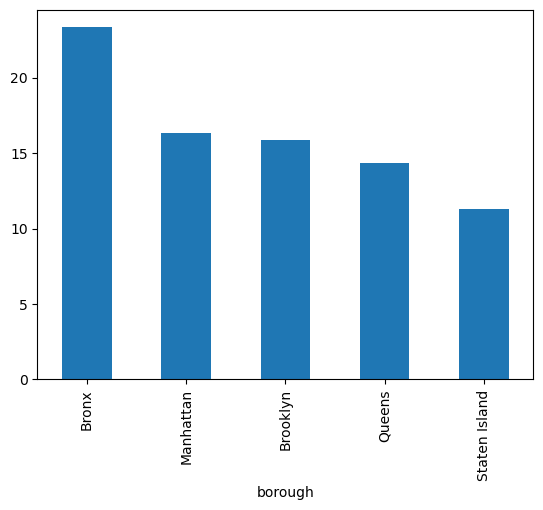

In [371]:
prio.groupby('borough')['food_insecure_percentage'].mean().sort_values(ascending=False).plot(kind='bar')

nta_id                                   0
nta_name                                 0
borough                                  0
food_insecure_percentage                 0
food_insecure_percentage_rank            0
unemployment_rate                        0
unemployment_rate_rank                   0
vulnerable_population_percentage         0
vulnerable_population_percentage_rank    0
supply_gap                               0
weighted_score                           0
dtype: int64
0


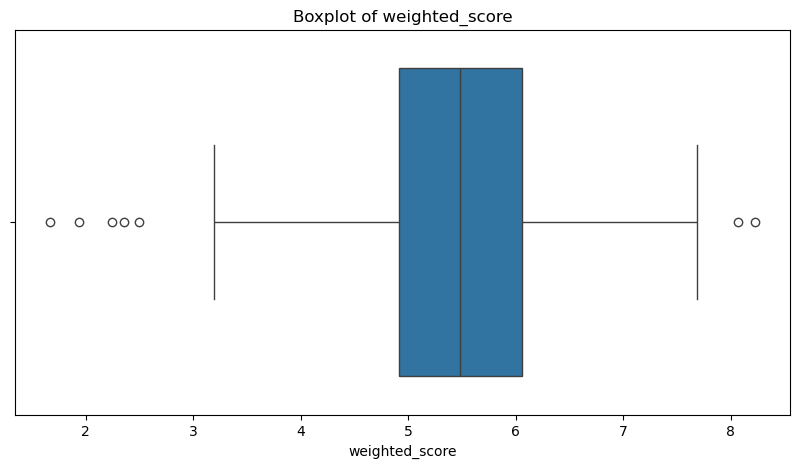

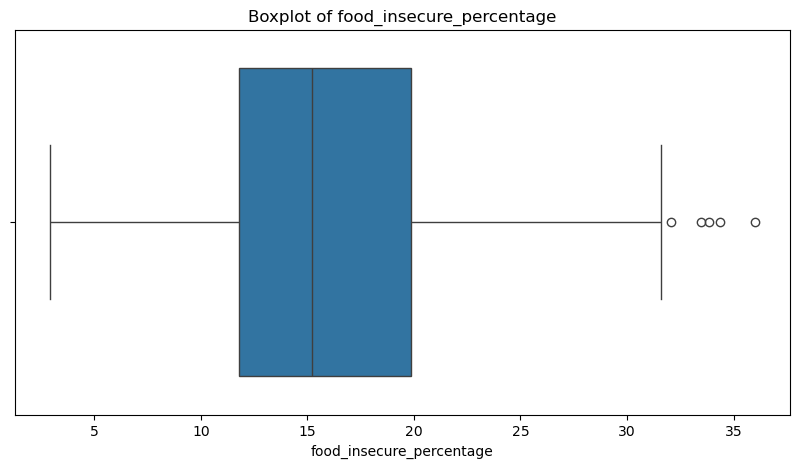

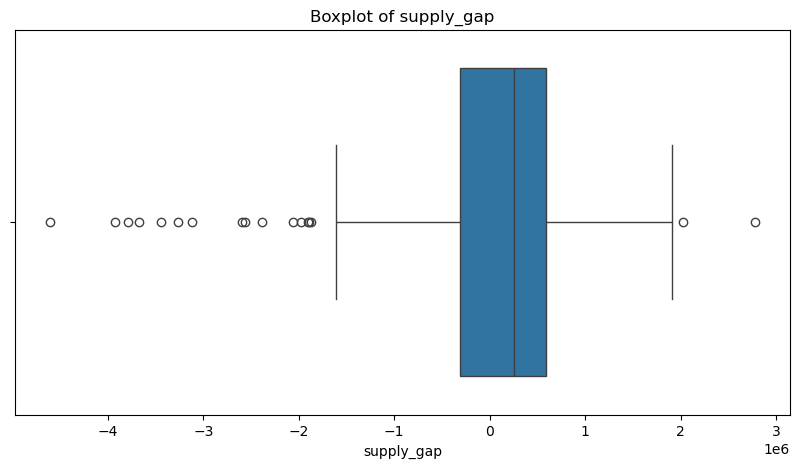

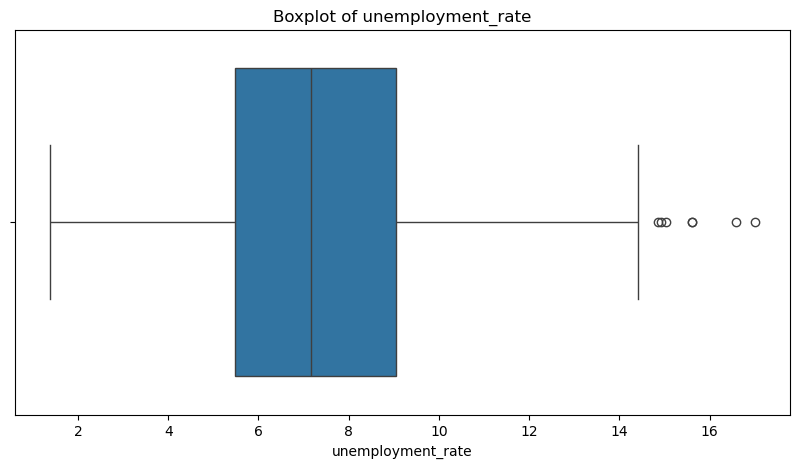

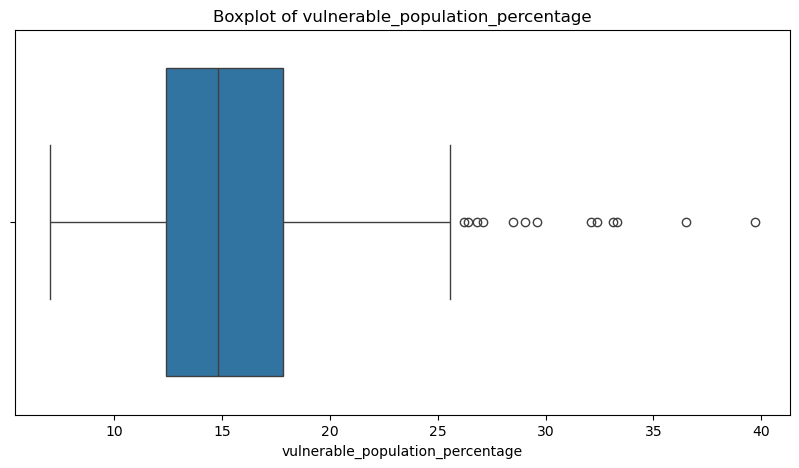

In [372]:
# Check for missing values
print(prio.isnull().sum())
# Check for duplicates
print(prio.duplicated().sum())
# Check for outliers using boxplots
numeric_columns = ['weighted_score', 'food_insecure_percentage', 'supply_gap', 'unemployment_rate', 'vulnerable_population_percentage']
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=prio[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [373]:
# write the summary statistics of the numeric columns
prio[numeric_columns].describe()

,weighted_score,food_insecure_percentage,supply_gap,unemployment_rate,vulnerable_population_percentage
count,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,5.414561,16.519289,-1.976900e+04,7.682386,15.842386
std,1.021824,6.620541,1.100397e+06,2.977905,5.602104
min,1.667900,2.920000,-4.606012e+06,1.380000,7.040000
25%,4.911100,11.790000,-3.097622e+05,5.470000,12.390000
50%,5.478200,15.210000,2.561395e+05,7.170000,14.810000
75%,6.058400,19.880000,5.894113e+05,9.060000,17.840000
max,8.221000,35.990000,2.776626e+06,17.000000,39.690000


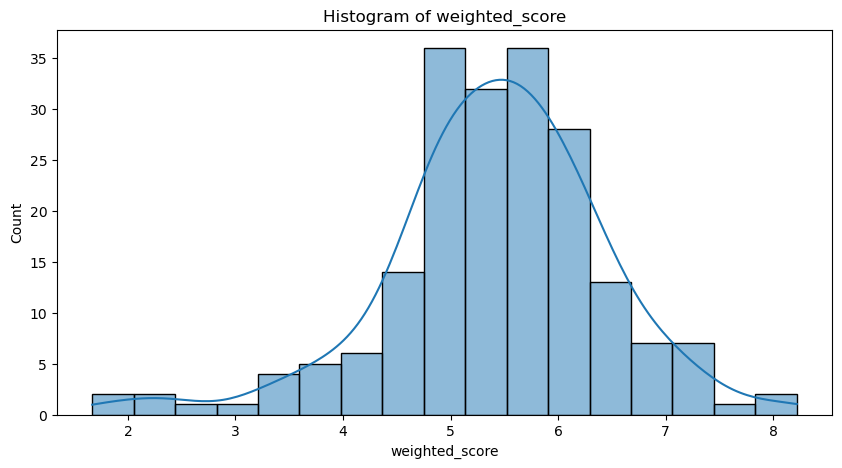

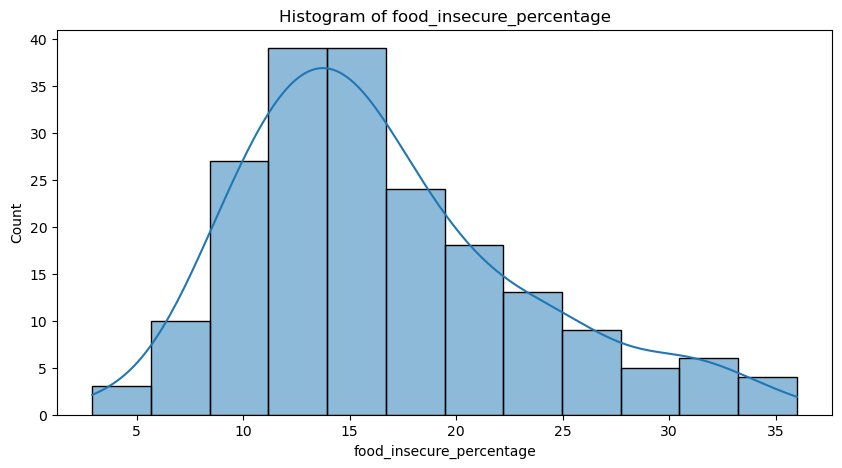

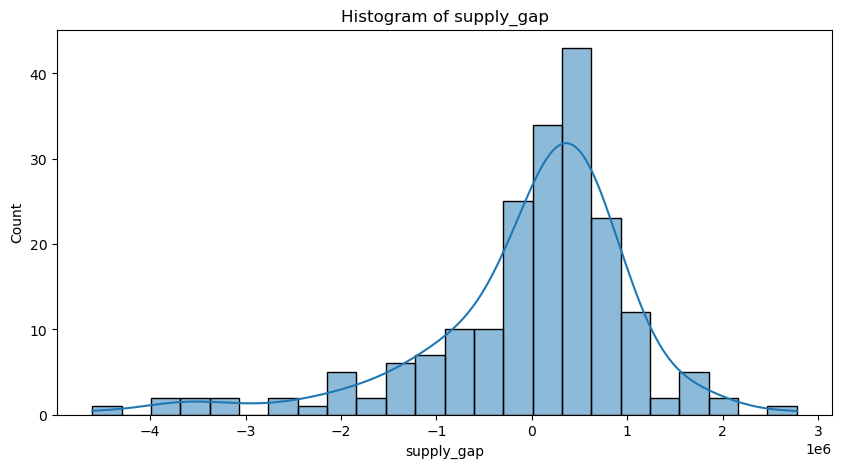

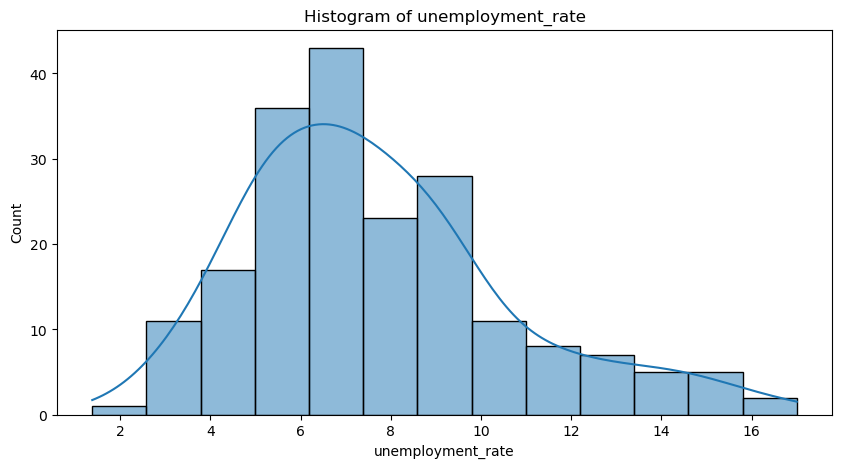

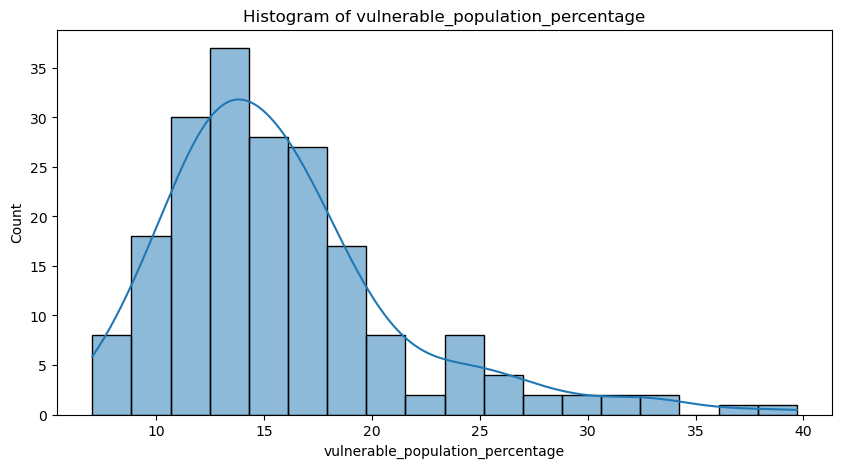

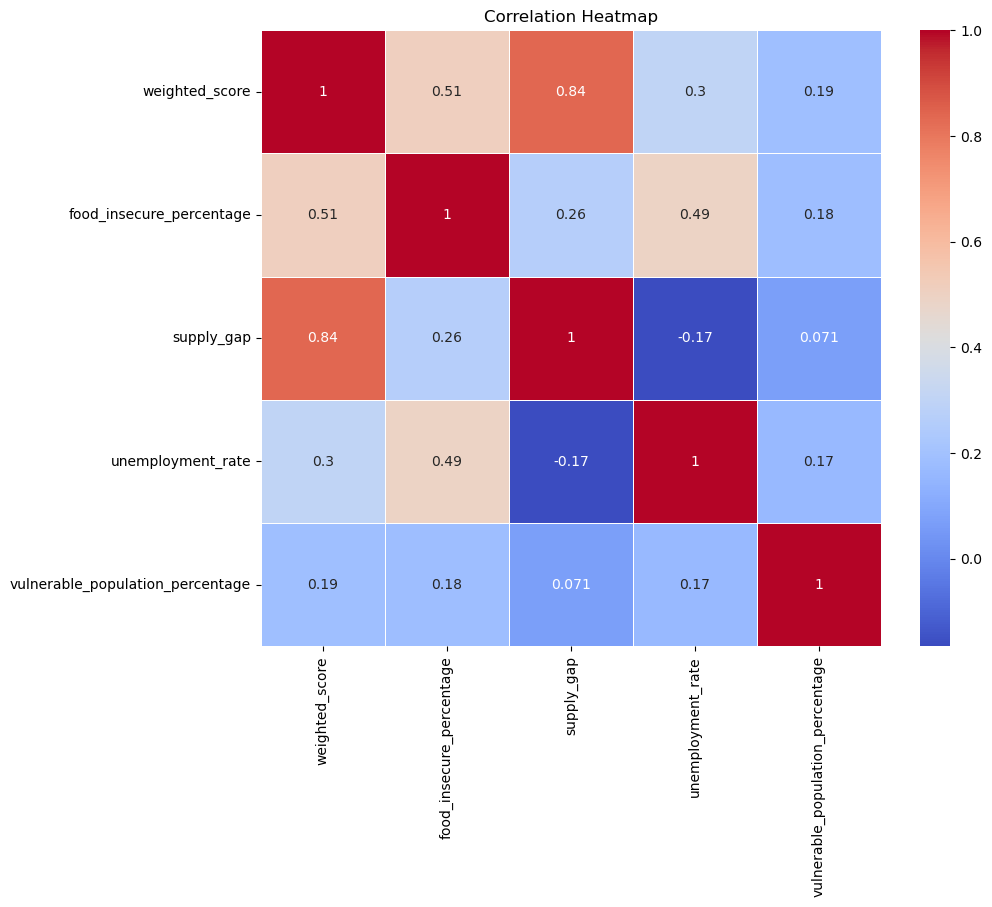

In [374]:
# Let's check the distribution of the data using histograms
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(prio[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Next, let's check the correlation between the numeric variables using a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = prio[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [375]:
# Neighborhood Food Insecurity Analysis

neighborhood_stats = prio.groupby('borough').agg({
    'nta_id': 'count',
    'food_insecure_percentage': ['mean', 'min', 'max', 'std'],
    'unemployment_rate': ['mean', 'min', 'max'],
    'vulnerable_population_percentage': ['mean', 'min', 'max'],
    'supply_gap': ['mean', 'min', 'max']
}).round(2)

In [376]:
neighborhood_stats

nta_id food_insecure_percentage                      \
               count                     mean    min    max   std   
borough                                                             
Bronx             37                    23.32  10.97  34.35  6.50   
Brooklyn          53                    15.87   7.51  35.99  5.21   
Manhattan         32                    16.30   8.11  33.46  5.75   
Queens            59                    14.37   2.92  31.09  5.74   
Staten Island     16                    11.32   6.00  23.78  4.34   

              unemployment_rate              vulnerable_population_percentage  \
                           mean   min    max                             mean   
borough                                                                         
Bronx                     11.24  5.62  17.00                            16.82   
Brooklyn                   7.28  3.36  14.85                            15.06   
Manhattan                  6.66  2.60  13.60                            13.82   
Queens                     6.92  3.18  15.62                            18.33   
Staten Island              5.64  1.38   8.91                            11.06   

                           supply_gap                          
                min    max       mean         min         max  
borough                                                        
Bronx          9.17  26.83  146958.75 -2560586.09  2022029.14  
Brooklyn       7.70  33.29 -215125.63 -4606011.51  2776626.10  
Manhattan      9.65  19.32  323628.17 -1608497.99  1463457.02  
Queens         7.59  39.69 -172473.03 -3923144.64  1730635.82  
Staten Island  7.04  16.05  118093.64 -1977610.23  1075153.92

In [377]:
# Top 10 most food insecure neighborhoods
top_insecure = prio.nsmallest(10, 'food_insecure_percentage_rank')[
    ['nta_name', 'borough', 'food_insecure_percentage', 'unemployment_rate', 'vulnerable_population_percentage']
]

In [378]:
top_insecure

,nta_name,borough,food_insecure_percentage,unemployment_rate,vulnerable_population_percentage
0,East Williamsburg,Brooklyn,35.99,6.38,12.43
7,West Farms,Bronx,34.35,16.58,16.67
11,Belmont,Bronx,33.87,15.03,22.36
80,Midtown-Times Square,Manhattan,33.46,5.77,15.68
16,Highbridge,Bronx,32.07,9.79,15.18
28,Claremont Village-Claremont (East),Bronx,31.58,14.92,12.72
10,Mott Haven-Port Morris,Bronx,31.43,13.11,15.27
51,Tremont,Bronx,31.25,12.47,16.40
85,Glen Oaks-Floral Park-New Hyde Park,Queens,31.09,4.19,13.63
101,Queensboro Hill,Queens,30.92,5.16,28.48


posx and posy should be finite values
posx and posy should be finite values


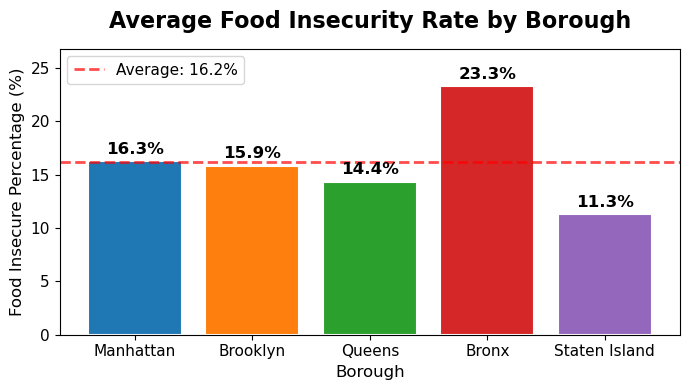

In [379]:
# Average Food Insecurity Rate by Borough
fig1, ax2 = plt.subplots(figsize=(7, 4))
borough_order = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', 'Unknown']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
# compute mean food insecurity per borough and align with borough_order
food_insec_mean = prio.groupby('borough')['food_insecure_percentage'].mean().reindex(borough_order)
# for plotting, replace NaN with 0 so bars render (we'll label missing values as 'N/A')
#food_insec_plot = food_insec_mean.fillna(0)
bars = ax2.bar(borough_order, food_insec_mean, color=colors, edgecolor='white', linewidth=1.5)
ax2.set_title('Average Food Insecurity Rate by Borough', fontsize=16, fontweight='bold', pad=15)
ax2.set_ylabel('Food Insecure Percentage (%)', fontsize=12)
ax2.set_xlabel('Borough', fontsize=12)
ax2.tick_params(axis='x', rotation=0, labelsize=11)
ax2.tick_params(axis='y', labelsize=11)
for bar, val in zip(bars, food_insec_mean):
    if pd.isna(val):
        label = 'N/A'
    else:
        label = f'{val:.1f}%'
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.4, 
             label, ha='center', va='bottom', fontsize=12, fontweight='bold')
# set y limit using non-NaN max (fallback to 1 if all NaN)
max_val = np.nanmax(food_insec_mean.values) if not np.all(np.isnan(food_insec_mean.values)) else 1
ax2.set_ylim(0, max_val * 1.15)
# NYC average (ignore NaNs)
nyc_avg = np.nanmean(food_insec_mean.values)
ax2.axhline(y=nyc_avg, color='red', linestyle='--', alpha=0.7, 
            label=f'Average: {nyc_avg:.1f}%', linewidth=2)
ax2.legend(fontsize=11)
plt.tight_layout()
plt.show()

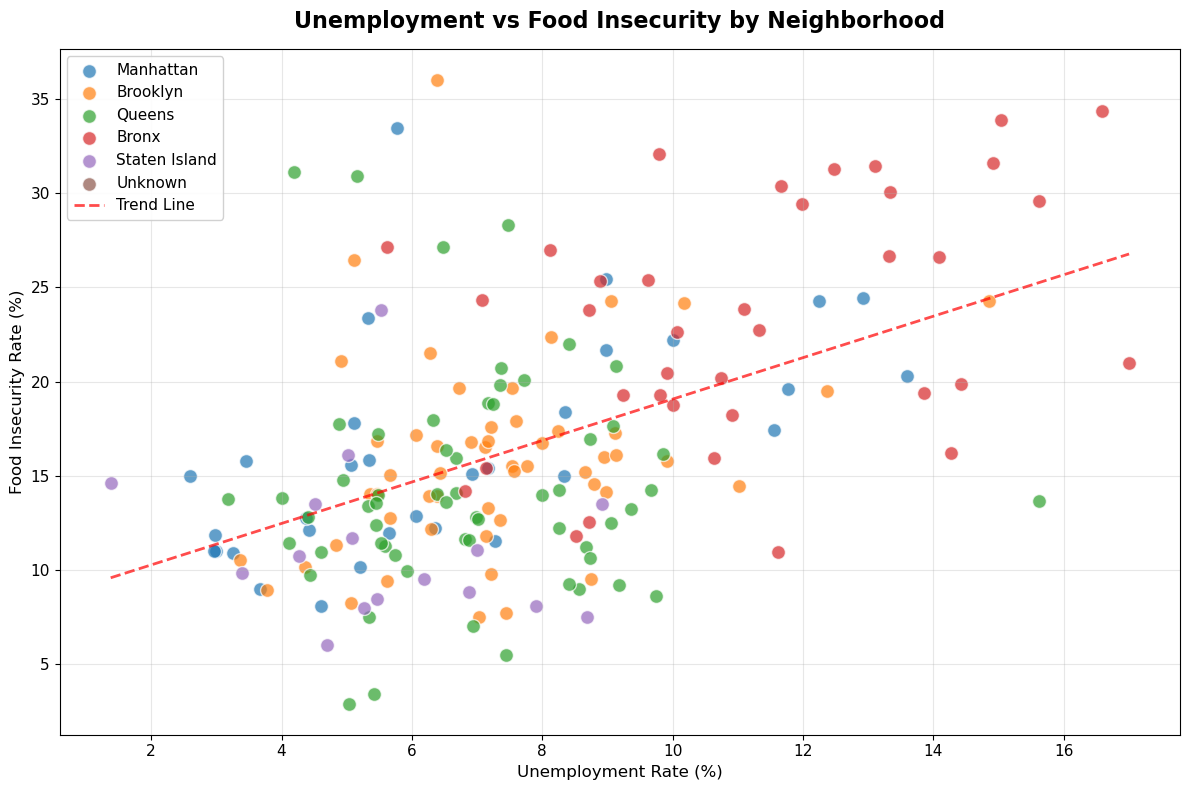

In [380]:
fig2, ax1 = plt.subplots(figsize=(12, 8))
for borough, color in zip(borough_order, colors):
    data = prio[prio['borough'] == borough]
    ax1.scatter(data['unemployment_rate'], data['food_insecure_percentage'], 
                 c=color, label=borough, alpha=0.7, s=100, edgecolors='white', linewidth=1)
ax1.set_xlabel('Unemployment Rate (%)', fontsize=12)
ax1.set_ylabel('Food Insecurity Rate (%)', fontsize=12)
ax1.set_title('Unemployment vs Food Insecurity by Neighborhood', fontsize=16, fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', labelsize=11)
# Add trend line
all_unemp = prio['unemployment_rate']
all_insec = prio['food_insecure_percentage']
z = np.polyfit(all_unemp, all_insec, 1)
p = np.poly1d(z)
x_line = np.linspace(all_unemp.min(), all_unemp.max(), 100)
ax1.plot(x_line, p(x_line), "r--", alpha=0.7, linewidth=2, label='Trend Line')
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
plt.tight_layout()

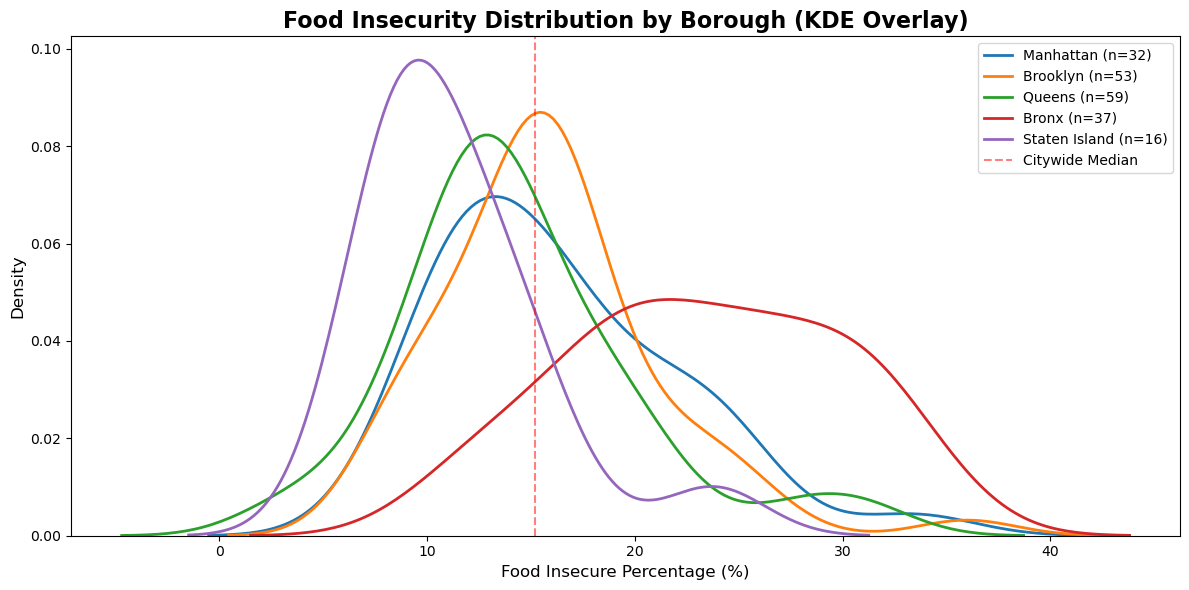

In [381]:
# OVERLAPPING KDE — food insecurity distributions by borough
fig, ax = plt.subplots(figsize=(12, 6))
for borough in borough_order:
    subset = prio[prio['borough'] == borough]['food_insecure_percentage']
    sns.kdeplot(subset, label=f"{borough} (n={len(subset)})", ax=ax, linewidth=2)
ax.set_title('Food Insecurity Distribution by Borough (KDE Overlay)', fontsize=16, fontweight='bold')
ax.set_xlabel('Food Insecure Percentage (%)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(fontsize=11)
ax.axvline(prio['food_insecure_percentage'].median(), color='red', linestyle='--', alpha=0.5, label='Citywide Median')
ax.legend()
plt.tight_layout()
plt.show()

### Supply Gap Analysis
The `supply_gap` variable is the most complex metric here. A positive value likely means demand exceeds supply (food desert), while negative means supply exceeds demand. We need to understand its distribution, its relationship to the weighted score, and which boroughs carry the greatest deficits.

=== Supply Gap Direction by Borough ===
supply_gap_direction  Demand > Supply (Gap)  Supply > Demand (Surplus)
borough                                                               
Bronx                                    24                         13
Brooklyn                                 29                         24
Manhattan                                27                          5
Queens                                   32                         27
Staten Island                            11                          5

Citywide: 123 neighborhoods with demand gap, 74 with supply surplus


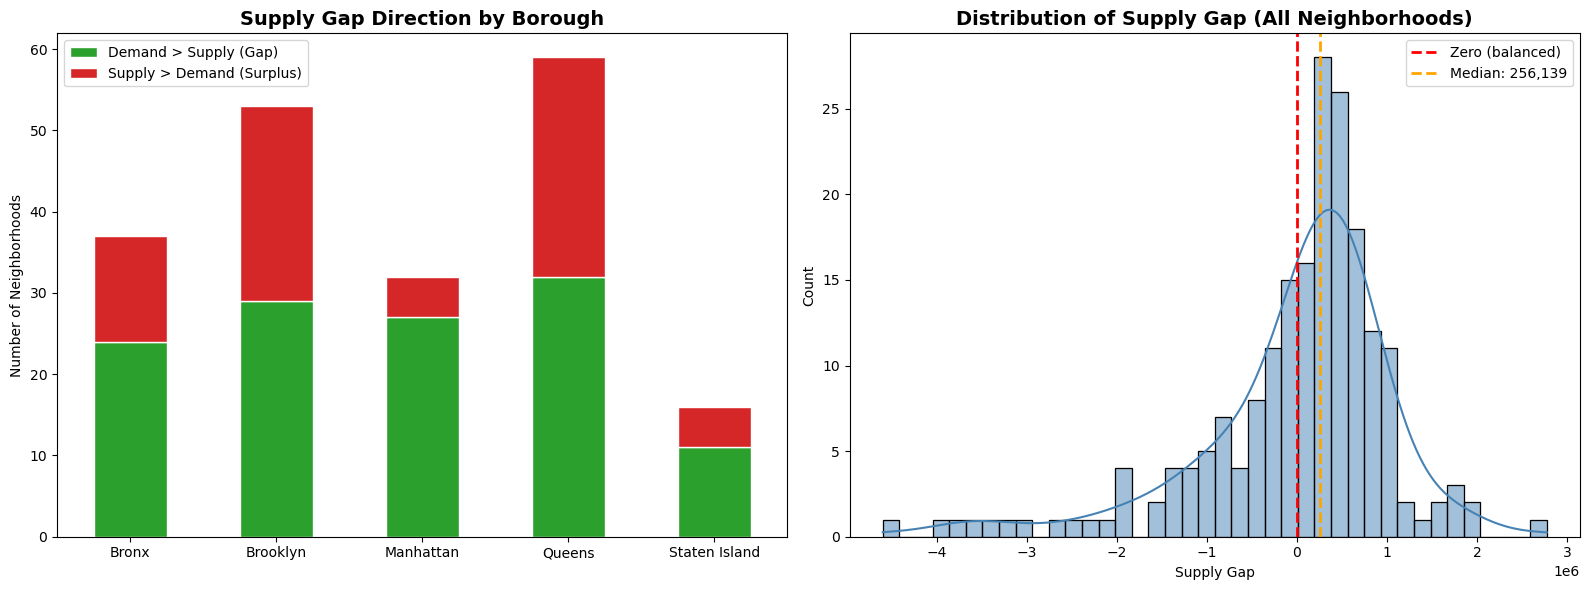

In [382]:
# SUPPLY GAP ANALYSIS — positive vs. negative, by borough

# Classify supply gap direction
prio['supply_gap_direction'] = np.where(prio['supply_gap'] > 0, 'Demand > Supply (Gap)', 'Supply > Demand (Surplus)')

# Counts
gap_counts = prio.groupby(['borough', 'supply_gap_direction']).size().unstack(fill_value=0)
print("=== Supply Gap Direction by Borough ===")
print(gap_counts)
print(f"\nCitywide: {(prio['supply_gap'] > 0).sum()} neighborhoods with demand gap, "
      f"{(prio['supply_gap'] <= 0).sum()} with supply surplus")

# Stacked bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: stacked bar of gap direction by borough
gap_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['#2ca02c', '#d62728'], edgecolor='white')
axes[0].set_title('Supply Gap Direction by Borough', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Neighborhoods')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='')

# Right: distribution of supply_gap magnitude
sns.histplot(prio['supply_gap'], bins=40, kde=True, ax=axes[1], color='steelblue')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero (balanced)')
axes[1].axvline(prio['supply_gap'].median(), color='orange', linestyle='--', linewidth=2, 
                label=f'Median: {prio["supply_gap"].median():,.0f}')
axes[1].set_title('Distribution of Supply Gap (All Neighborhoods)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Supply Gap')
axes[1].legend()

plt.tight_layout()
plt.show()

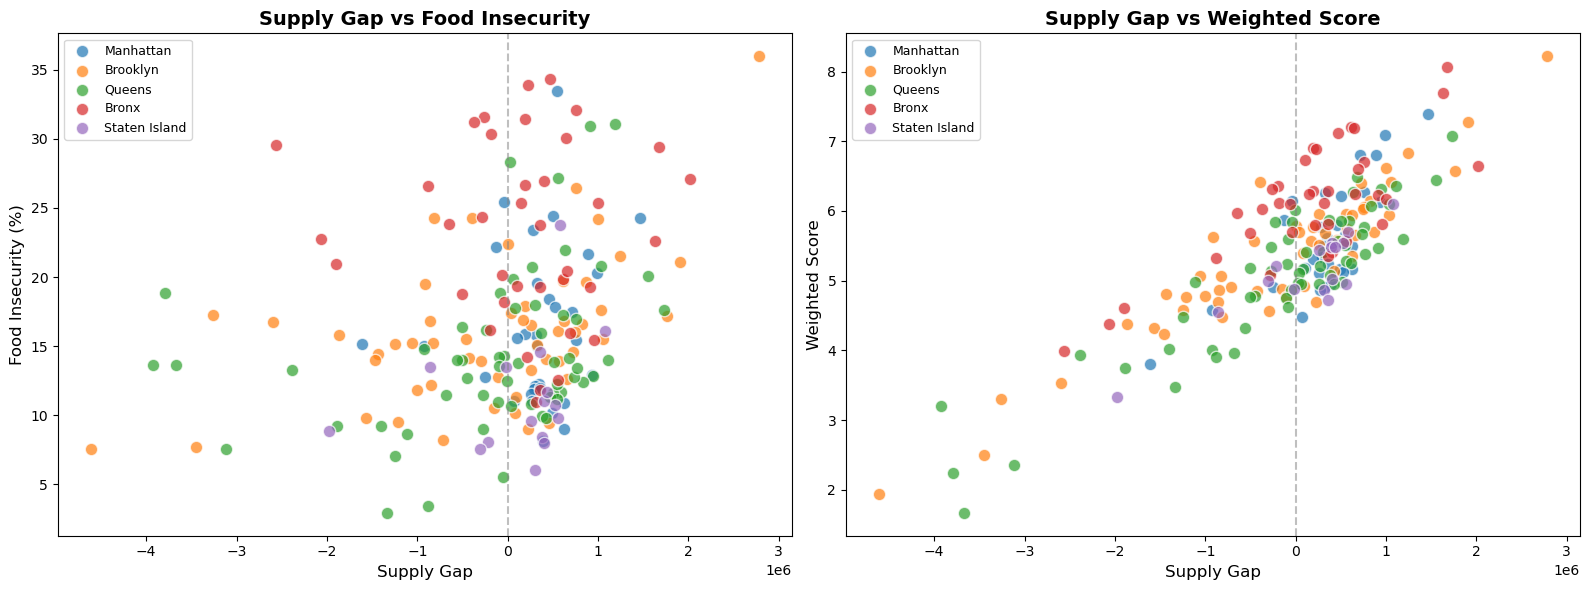

=== Correlations with Supply Gap ===
  supply_gap vs food_insecure_percentage: r = 0.2634
  supply_gap vs unemployment_rate: r = -0.1654
  supply_gap vs vulnerable_population_percentage: r = 0.0706
  supply_gap vs weighted_score: r = 0.8401


In [383]:
# SUPPLY GAP vs FOOD INSECURITY — is the gap worst where insecurity is highest?
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter: supply_gap vs food_insecure_percentage colored by borough
for borough, color in zip(borough_order, colors[:5]):
    mask = prio['borough'] == borough
    axes[0].scatter(prio.loc[mask, 'supply_gap'], prio.loc[mask, 'food_insecure_percentage'],
                    c=color, label=borough, alpha=0.7, s=80, edgecolors='white')
axes[0].axvline(0, color='grey', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Supply Gap', fontsize=12)
axes[0].set_ylabel('Food Insecurity (%)', fontsize=12)
axes[0].set_title('Supply Gap vs Food Insecurity', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)

# Scatter: supply_gap vs weighted_score
for borough, color in zip(borough_order, colors[:5]):
    mask = prio['borough'] == borough
    axes[1].scatter(prio.loc[mask, 'supply_gap'], prio.loc[mask, 'weighted_score'],
                    c=color, label=borough, alpha=0.7, s=80, edgecolors='white')
axes[1].axvline(0, color='grey', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Supply Gap', fontsize=12)
axes[1].set_ylabel('Weighted Score', fontsize=12)
axes[1].set_title('Supply Gap vs Weighted Score', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()

# Correlation between supply_gap and other metrics
print("=== Correlations with Supply Gap ===")
for col in ['food_insecure_percentage', 'unemployment_rate', 'vulnerable_population_percentage', 'weighted_score']:
    r = prio['supply_gap'].corr(prio[col])
    print(f"  supply_gap vs {col}: r = {r:.4f}")

## Weighted Score Decomposition
The `weighted_score` is the composite metric used to rank neighborhoods. We need to understand:
- Which input variables drive it most?
- Can we identify natural breakpoints (tiers) for prioritization?

Component Correlations with Weighted Score
  food_insecure_percentage                       r = +0.5121  (p = 1.45e-14)
  unemployment_rate                              r = +0.3034  (p = 1.46e-05)
  vulnerable_population_percentage               r = +0.1895  (p = 7.65e-03)
  supply_gap                                     r = +0.8401  (p = 1.04e-53)

Standardized Correlation (proxy for relative weight)
  food_insecure_percentage                       +0.5121
  unemployment_rate                              +0.3034
  vulnerable_population_percentage               +0.1895
  supply_gap                                     +0.8401


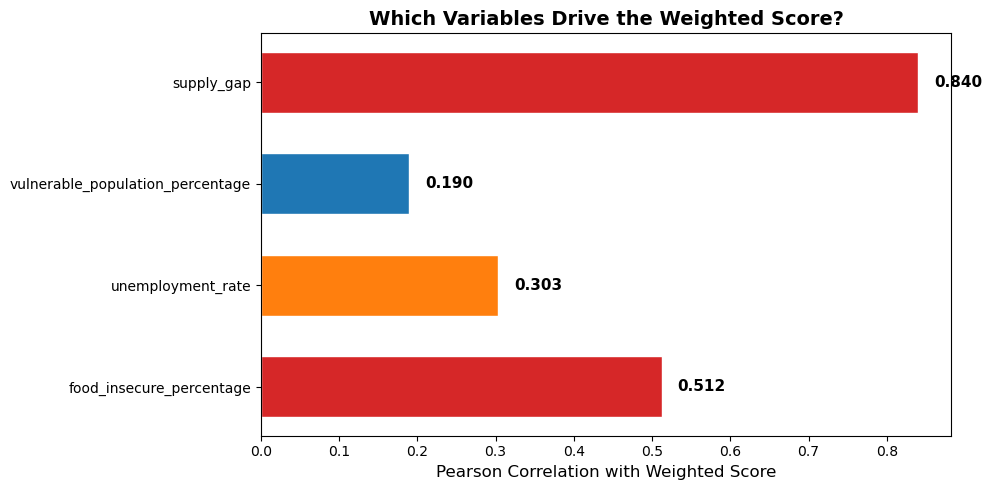

In [384]:
# WEIGHTED SCORE DECOMPOSITION — what drives the composite score?
from scipy import stats

# Correlations of each component with weighted_score
print("Component Correlations with Weighted Score")
components = ['food_insecure_percentage', 'unemployment_rate', 
              'vulnerable_population_percentage', 'supply_gap']
for col in components:
    r, p_val = stats.pearsonr(prio[col], prio['weighted_score'])
    print(f"  {col:45s}  r = {r:+.4f}  (p = {p_val:.2e})")

# Quick OLS to see relative contribution (standardized coefficients)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(prio[components]), 
    columns=components
)
r_values = X_scaled.corrwith(pd.Series(scaler.fit_transform(prio[['weighted_score']]).flatten()))
print("\nStandardized Correlation (proxy for relative weight)")
for col, r in r_values.items():
    print(f"  {col:45s}  {r:+.4f}")

# Visualization: component contributions
fig, ax = plt.subplots(figsize=(10, 5))
corrs = [stats.pearsonr(prio[col], prio['weighted_score'])[0] for col in components]
colors_bar = ['#d62728' if c > 0.5 else '#ff7f0e' if c > 0.3 else '#1f77b4' for c in corrs]
bars = ax.barh(components, corrs, color=colors_bar, edgecolor='white', height=0.6)
ax.set_xlabel('Pearson Correlation with Weighted Score', fontsize=12)
ax.set_title('Which Variables Drive the Weighted Score?', fontsize=14, fontweight='bold')
ax.axvline(0, color='grey', linestyle='-', alpha=0.3)
for bar, val in zip(bars, corrs):
    ax.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
            va='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

### Normality Tests & Distribution Shape
We need to perform some normality check (skewness, and kurtosis) to check whether parametric tests (t-tests, Pearson correlation, OLS regression) are appropriate, or whether we need non-parametric alternatives.

=== Normality Test Results ===
                        Variable  Shapiro-Wilk Stat Shapiro-Wilk p-value Normal? (p>0.05)  Skewness  Kurtosis Skew Interpretation
                  weighted_score             0.9647             7.47e-05               NO    -0.631     1.843         Left-skewed
        food_insecure_percentage             0.9494             1.94e-06               NO     0.794     0.242        Right-skewed
                      supply_gap             0.8782             1.61e-11               NO    -1.481     3.386         Left-skewed
               unemployment_rate             0.9490             1.78e-06               NO     0.858     0.611        Right-skewed
vulnerable_population_percentage             0.8901             7.74e-11               NO     1.481     2.866        Right-skewed


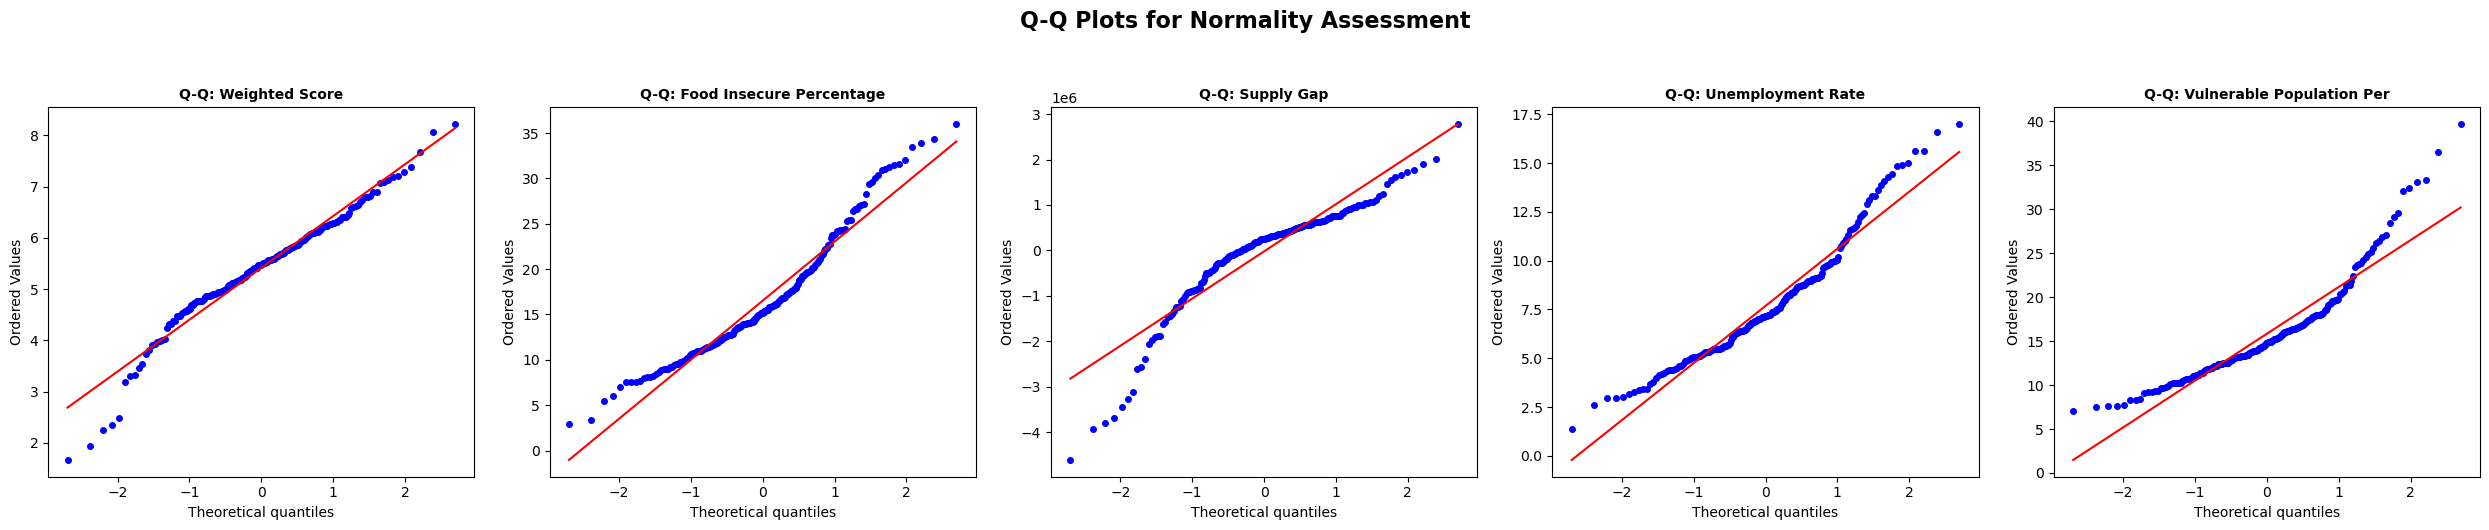


=== Interpretation ===
If p-value < 0.05, the variable is NOT normally distributed.
This affects choice of statistical tests:
  - Normal data -> Pearson correlation, t-tests, ANOVA, OLS regression
  - Non-normal data -> Spearman correlation, Mann-Whitney U, Kruskal-Wallis, robust regression


In [385]:
# NORMALITY TESTS — Shapiro-Wilk, Skewness, Kurtosis

normality_results = []
for col in numeric_columns:
    shapiro_stat, shapiro_p = stats.shapiro(prio[col])
    skew = prio[col].skew()
    kurt = prio[col].kurtosis()
    normality_results.append({
        'Variable': col,
        'Shapiro-Wilk Stat': round(shapiro_stat, 4),
        'Shapiro-Wilk p-value': f"{shapiro_p:.2e}",
        'Normal? (p>0.05)': 'Yes' if shapiro_p > 0.05 else 'NO',
        'Skewness': round(skew, 3),
        'Kurtosis': round(kurt, 3),
        'Skew Interpretation': 'Symmetric' if abs(skew) < 0.5 else ('Right-skewed' if skew > 0 else 'Left-skewed')
    })

normality_df = pd.DataFrame(normality_results)
print("=== Normality Test Results ===")
print(normality_df.to_string(index=False))

# Q-Q plots for all numeric variables
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for ax, col in zip(axes, numeric_columns):
    stats.probplot(prio[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q: {col.replace("_", " ").title()[:25]}', fontsize=10, fontweight='bold')
    ax.get_lines()[0].set_markersize(4)
plt.suptitle('Q-Q Plots for Normality Assessment', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("\n=== Interpretation ===")
print("If p-value < 0.05, the variable is NOT normally distributed.")
print("This affects choice of statistical tests:")
print("  - Normal data -> Pearson correlation, t-tests, ANOVA, OLS regression")
print("  - Non-normal data -> Spearman correlation, Mann-Whitney U, Kruskal-Wallis, robust regression")

In [386]:
# SPEARMAN vs PEARSON — detect non-linear monotonic relationships
print("=== Pearson (linear) vs Spearman (monotonic) Correlations ===")
print(f"{'Variable Pair':60s}  {'Pearson':>8s}  {'Spearman':>8s}  {'Diff':>6s}  {'Non-linear?':>12s}")
print("-" * 100)

for i, col1 in enumerate(components):
    for col2 in components[i+1:]:
        pearson_r, _ = stats.pearsonr(prio[col1], prio[col2])
        spearman_r, _ = stats.spearmanr(prio[col1], prio[col2])
        diff = abs(spearman_r) - abs(pearson_r)
        flag = "LIKELY" if abs(diff) > 0.05 else ""
        print(f"  {col1} vs {col2:30s}  {pearson_r:+.4f}    {spearman_r:+.4f}   {diff:+.3f}  {flag}")

print("\nIf |Spearman| >> |Pearson|, the relationship is monotonic but non-linear.")
print("This suggests using Spearman correlations and considering non-linear models.")

=== Pearson (linear) vs Spearman (monotonic) Correlations ===
Variable Pair                                                  Pearson  Spearman    Diff   Non-linear?
----------------------------------------------------------------------------------------------------
  food_insecure_percentage vs unemployment_rate               +0.4945    +0.4753   -0.019  
  food_insecure_percentage vs vulnerable_population_percentage  +0.1808    +0.2964   +0.116  LIKELY
  food_insecure_percentage vs supply_gap                      +0.2634    +0.2636   +0.000  
  unemployment_rate vs vulnerable_population_percentage  +0.1660    +0.2905   +0.125  LIKELY
  unemployment_rate vs supply_gap                      -0.1654    -0.1438   -0.022  
  vulnerable_population_percentage vs supply_gap                      +0.0706    +0.0741   +0.003  

If |Spearman| >> |Pearson|, the relationship is monotonic but non-linear.
This suggests using Spearman correlations and considering non-linear models.


## EDA SUMMARY (Neighborhood Prioritization dataset)

### 1. Data Overview
The neighborhood dataset contains 197 NYC neighborhoods (NTAs) across the 5 boroughs. No missing values and duplicated data was found during the eda process. 
**Borough Distribution**: Across the 5 borough, Queens count 59 neighborhoods, Brooklyn 53, The Bronx 37, Manhattan 32, and Staten Island 16. This distribution across boroughs are unbalanced which can affect our statistical analysis in borough comparisons.

### 2. KEY INSIGHTS FROM EDA
**A. Central Tendency & Spread of the data**
- The **food insecurity** rate ranges from 2.92% to 35.99% (mean=16.5%, std=6.6%). This is a wide spread, because the most insecure neighborhood has more than 12 times the insecurity rate of the least.
- The **unemployment** ranges from 1.38% to 17.00% (mean=7.7%). It has a moderate positive skewed values.
- The **vulnerable population** rate ranges from 7.04% to 39.69% (mean=15.8%). Queens has outlier neighborhoods with very high vulnerability.
- The **supply gap** spans from -4.6 to +2.8 with a mean near zero (-19,8). The data distribution suggests roughly half the neighborhoods have food supply surplus and half have deficits.
- The **weighted score** (1.67 to 8.22, mean=5.41) is relatively normally distributed. 



**B. Borough-Level Patterns**
- **Bronx** leads on nearly every negative indicator: highest mean food insecurity (23.3%), highest unemployment (11.2%), and highest proportion of "Critical" priority neighborhoods.
- **Staten Island** has the lowest mean food insecurity (11.3%) and unemployment (5.6%), but its small sample (n=16) makes statistical comparisons less reliable.
- **Queens** has moderate food insecurity but the highest mean vulnerable population percentage (18.3%) — an indicator that may be underweighted in the composite score.
- **Brooklyn** and **Manhattan** occupy the middle range but have high within-borough variance.

**C. Correlation Structure**
- **Unemployment → Food Insecurity**: have a strong positive correlation (r ≈ 0.5-0.7).
- **Vulnerable Population**: has a non-linear relationship with food insecurity. Will be double testing with Spearman correlation.


**D. Supply Gap Deep Dive**
- The supply gap is not evenly distributed by borough. Brooklyn and Queens have more neighborhoods with food surpluses (negative supply gap), while the Bronx and Manhattan tend toward demand gaps (positive).

----
# Emergency Food Assistance Program
### Program Level

In [387]:
# Merge Efap with NTA mapping to get borough info
efap = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Projects/CID_Food_Access/data/clean/efap_cleaned.csv')
mapping = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Projects/CID_Food_Access/data/clean/efap_nta_mapping.csv')
efap = efap.merge(mapping, on="efap_id", how="left")

In [388]:
print(efap.shape)
efap['nta_id'].isna().sum()

(561, 10)


np.int64(8)

#### insight:
8 out of 561 EFAP sites (1.4%) did not map to an NTA. Because this represents a small proportion of total sites, we proceed by excluding these records from neighborhood-level aggregation.

In [389]:
efap[efap["nta_id"].isna()]

,efap_id,program_name,access_type,has_pantry_access,has_kitchen_access,weekday_available,weekend_available,nta_id,lat,lon
54,81727,AFRICAN SERVICES COMMITTEE,Pantry,1,0,1,0,NaN,NaN,NaN
123,87357,ST. EDWARD FOOD PANTRY,Pantry,1,0,1,0,NaN,NaN,NaN
440,85774,NEW BEGINNINGS FOOD PANTRY,Pantry,1,0,1,0,NaN,NaN,NaN
468,80891,CORPUS CHRISTI FOOD PANTRY,Pantry,1,0,1,0,NaN,NaN,NaN
474,85348,THE LEGACY CENTER COMMUNITY DEVELOPMENT CORP,Pantry,1,0,1,0,NaN,NaN,NaN
517,85284,"VETS INC, HOLLIS GARDENS",Pantry,1,0,1,0,NaN,NaN,NaN
537,83567,"THE HARDING FORD VISION, INC",Pantry,1,0,1,1,NaN,NaN,NaN
550,85710,MUNA SOCIAL SERVICE SOUTH JAMAICA,Pantry,1,0,1,0,NaN,NaN,NaN


In [390]:
efap = efap.dropna(subset=["nta_id"])
print(efap["nta_id"].isna().sum())

0


8 EFAP sites (1.4% of total) lacked geospatial coordinates (latitude and longitude), and therefore could not be mapped to an NTA. Because neighborhood-level aggregation requires valid geographic identifiers, these records were excluded from subsequent analysis. This exclusion represents a minimal proportion of total sites and is unlikely to materially affect results.

In [391]:
mapping["efap_id"].nunique()
mapping.shape

(553, 4)

# CONTEXT - Program-Level EFAP Structure and Access Model
The EFAP dataset represents the supply-side structure of New York City’s emergency food assistance system. At the program level, each site is categorized by its access type, primarily distinguishing between pantry access (take-home groceries) and kitchen access (prepared hot meals). Pantry programs provide groceries such as canned goods, rice, pasta, or produce, which households are expected to store and prepare themselves. Kitchen programs, in contrast, provide prepared meals on-site, typically consumed the same day. Some programs may offer both, but the distinction between pantry and kitchen access reflects fundamentally different models of food support.

If the EFAP system is predominantly pantry-based, this suggests that the city’s emergency food infrastructure is structured around assumptions of household stability and food preparation capacity. Pantry programs implicitly assume that recipients have access to refrigeration, food storage, cooking appliances, and predictable routines for meal preparation. In contrast, kitchen-based programs provide immediate, ready-to-eat meals and require fewer household-level resources, making them more accessible for individuals or families without consistent cooking facilities.

This distinction is especially important in the context of families living in shelters. Shelter conditions vary by facility type. Some family shelters, including commercial hotel placements, may offer limited or no in-room kitchen access, shared facilities with restricted hours, or minimal storage capacity. In such contexts, a pantry-dominant food assistance system may not align with the lived realities of shelter residents. While pantry programs increase food availability, they may not translate into functional access if families lack the means to safely store or prepare groceries. Kitchen-based programs may better support immediate food needs for families with constrained living arrangements.

Therefore, analyzing the distribution of pantry versus kitchen access within EFAP is not merely descriptive. It provides insight into the underlying design of the city’s food assistance system and allows us to evaluate whether the structure of supply aligns with the housing instability and facility constraints experienced by families in shelters. This structural lens strengthens our later neighborhood-level analysis by clarifying what “food access” functionally means before examining where programs are geographically located.

## Context - why I created  specific binary indictors such as pantry acccess or kitchen access 
- While access_type provides categorical information about the service model, separate binary indicators (has_pantry_access, has_kitchen_access) were engineered to allow clearer analytical and modeling flexibility. These flags preserve overlap for hybrid sites and enable direct measurement of pantry and kitchen capacity without requiring categorical encoding. This structure simplifies aggregation and supports later neighborhood-level modeling of supply composition.

In [392]:
efap.keys()

Index(['efap_id', 'program_name', 'access_type', 'has_pantry_access',
       'has_kitchen_access', 'weekday_available', 'weekend_available',
       'nta_id', 'lat', 'lon'],
      dtype='object')

In [393]:
# let's check the distribution using .value_counts(), .value_counts(normalize=True) 
# to see %'s and .crosstab to compare categorical variables 

# check distribution of access_type
efap["access_type"].value_counts()

access_type
Pantry              444
Kitchen              81
Pantry + Kitchen     28
Name: count, dtype: int64

In [394]:
efap["access_type"].value_counts(normalize=True)

access_type
Pantry              0.802893
Kitchen             0.146474
Pantry + Kitchen    0.050633
Name: proportion, dtype: float64

In [395]:
print(efap["has_pantry_access"].mean() * 100)
print(efap["has_kitchen_access"].mean() * 100)


85.35262206148282
19.710669077757686


### Insight for distribution 
- The distribution of access types shows that approximately 80% of EFAP programs are pantry-only, 15% are kitchen-only, and 5% provide both pantry and kitchen access. When examining access flags more broadly, 85% of programs offer pantry access (including hybrid sites), while only about 20% offer kitchen access. This indicates that NYC’s EFAP system is heavily structured around a take-home grocery model rather than prepared meal distribution.

- Side note: The predominance of pantry-based EFAP programs suggests a supply model centered on take-home food preparation, which may not fully align with the constraints faced by families in shelter settings with limited cooking and storage access.
    - This makes me ask why do they priotrize pantries? However that's scope creeping because our CRQ is not "Why is the system pantry dominant?” but "Do high-priority neighborhoods have fewer food assistance options?"! 

## Next is to look at temporal accessbility - weekend, weekday 
- Which access type has the highest weekend availability rate?

In [396]:
# crosstab to compare access_type and weekend avabilibity 
pd.crosstab(
    efap["access_type"],
    efap["weekend_available"],
    normalize="index"
) * 100

weekend_available,0,1
access_type,,
Kitchen,65.432099,34.567901
Pantry,66.891892,33.108108
Pantry + Kitchen,82.142857,17.857143


#### Key takeaway
- Among kitchen sites, 34.6% are weekend available.
- Among pantry sites, 33.1% are weekend available.
- Among hybrid sites, 17.9% are weekend available.
    - Weekend availability appears structurally limited across all access types, and hybrid sites are the least likely to operate on weekends.

In [397]:
pd.crosstab(
    efap["access_type"],
    efap['weekday_available'],
    normalize="index"
) * 100


weekday_available,0,1
access_type,,
Kitchen,28.395062,71.604938
Pantry,25.000000,75.000000
Pantry + Kitchen,7.142857,92.857143


In [398]:
pd.crosstab(efap["access_type"],efap["weekday_available"])

weekday_available,0,1
access_type,,
Kitchen,23,58
Pantry,111,333
Pantry + Kitchen,2,26


In [399]:
pd.crosstab(efap["access_type"], efap["weekend_available"])

weekend_available,0,1
access_type,,
Kitchen,53,28
Pantry,297,147
Pantry + Kitchen,23,5


##### Key takeaway
- While pantry-based programs dominate NYC’s EFAP system, temporal accessibility reveals an even stronger structural pattern: 
    - the vast majority of programs operate on weekdays, while weekend availability is limited across all access types. Notably, hybrid (Pantry + Kitchen) sites are highly likely to operate on weekdays (~93%) but are among the least likely to offer weekend services (~18%). This suggests that temporal flexibility is concentrated during the workweek, potentially limiting access for families whose schedules or shelter constraints make weekday attendance difficult.

In [400]:
count_programs = efap.groupby('program_name').size().sort_values(ascending=False)
count_programs

program_name
AAIDS CENTER OF QUEENS COUNTY                3
HOLY TABERNACLE CHURCH INC.                  2
MAKE THE ROAD NEW YORK                       2
ST. ANN'S CHURCH OF MORRISANIA               2
THE URBAN OUTREACH CENTER OF NYC             2
                                            ..
COMMUNITY HEALTH ACTION OF STATEN ISLAND     1
COMMUNITY CHURCH OF CHRIST FOOD PANTRY       1
COMMUNITY CARE FOOD PANTRY                   1
COMMUNITY ALLIANCE INITIATIVE                1
ZEINA LORRAINE INC                           1
Length: 506, dtype: int64

In [401]:
# print counts where its >1
count_programs.value_counts()

1    460
2     45
3      1
Name: count, dtype: int64

#### key takeaway
The EFAP supply system is highly decentralized. Approximately 91% of program names operate a single site, with only 9% operating more than one location. Multi-site operators account for roughly 17% of total sites, indicating limited structural concentration within the system.

### NTA Level

In [402]:
# create a total_sites per nta column to see how many EFAP sites exist within each NTA.
total_sites = (efap.groupby("nta_id")["efap_id"].nunique().reset_index().rename(columns={"efap_id": "total_sites"}))
total_sites["total_sites"].value_counts().sort_index()

total_sites
1     41
2     24
3     22
4     19
5     15
6      9
7      8
8      6
9      3
10     1
12     3
16     1
Name: count, dtype: int64

In [403]:
print(total_sites.shape)          # should be (152, 2)
print(total_sites["nta_id"].nunique())  # should be 152

(152, 2)
152


##### Key takeaway on how many NTAs have X number of sites?
- 41 NTAs have exactly 1 site
- 24 NTAs have exactly 2 sites
- 22 NTAs have exactly 3 sites
- 19 NTAs have exactly 4 sites
- 1 NTA has 16 sites and etc..

There are 152 NTAs that contain at least one EFAP site. Among those 152:
- The most common situation is 1 site.
- There are some moderately dense NTAs (5–8 sites).
- There is at least one very dense NTA (16 sites).
    - So supply is not evenly distributed. It is right-skewed.

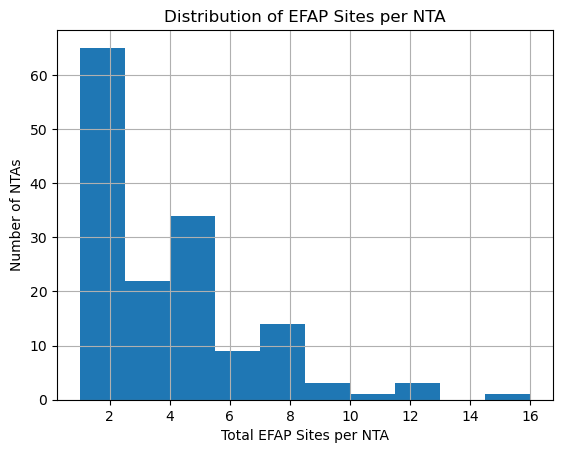

In [404]:
import matplotlib.pyplot as plt

plt.figure()
total_sites["total_sites"].hist()
plt.xlabel("Total EFAP Sites per NTA")
plt.ylabel("Number of NTAs")
plt.title("Distribution of EFAP Sites per NTA")
plt.show()

##### Key takeway
The distribution of EFAP sites per NTA is right-skewed, with most neighborhoods containing only 1–3 sites and a small number of NTAs exhibiting significantly higher concentrations (10+ sites). This indicates uneven geographic distribution of food assistance supply across NYC.

### Next step
Right now, I know that supply is uneven. But concentration can mean two things:
- Some NTAs have many sites OR many NTAs have very few sites.
- lets check what is the median vs the mean of total_sites?

In [405]:
total_sites["total_sites"].describe()

count    152.000000
mean       3.638158
std        2.739337
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       16.000000
Name: total_sites, dtype: float64

##### Key takeaway:
- 25% of NTAs have 1 site only.
- 50% or half of NTAs have 3 or fewer EFAP sites.
- 75% of NTAs have 5 or fewer.
- A few NTAs stretch up to 16 sites.

So basically supply is uneven but not dominated by extreme outliers. There are some higher-density neighborhoods but most sit between 1 and 5 sites. This is nuanced.

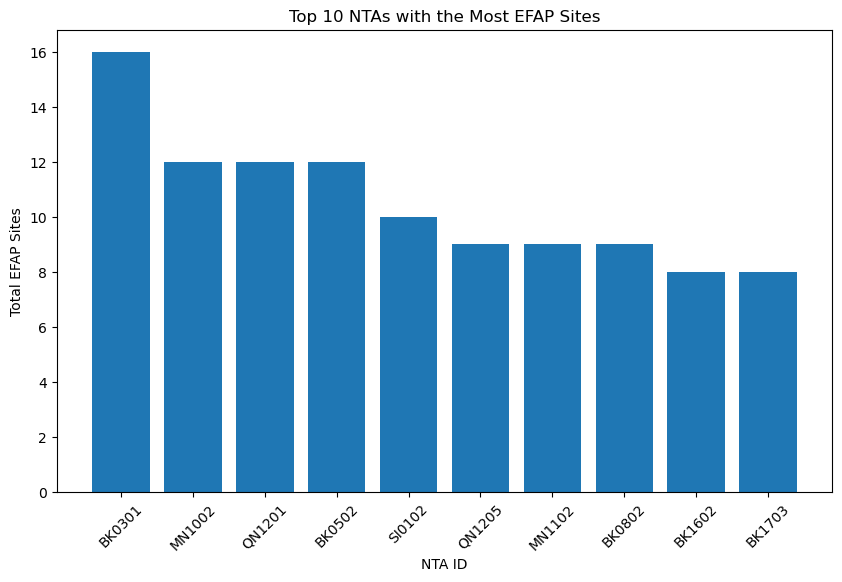

In [406]:
# create a visual to see the top ten nta with the most efap sites.
top_10_ntas = total_sites.sort_values(by="total_sites", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_ntas["nta_id"], top_10_ntas["total_sites"])
plt.xlabel("NTA ID")
plt.ylabel("Total EFAP Sites")
plt.title("Top 10 NTAs with the Most EFAP Sites")
plt.xticks(rotation=45)
plt.show()

### Next step - show pantry vs kitchen distribution across all NTAs first

In [407]:
# group by nta_id and sum the has_pantry_access and has_kitchen_access columns to see how many sites have pantry and kitchen access within each NTA.
access_summary = efap.groupby("nta_id")[["has_pantry_access", "has_kitchen_access"]].sum().sort_index()
access_summary  

,has_pantry_access,has_kitchen_access
nta_id,,
BK0101,1,0
BK0102,1,0
BK0103,1,0
BK0104,1,0
BK0202,2,1
...,...,...
SI0201,1,0
SI0202,1,0
SI0203,1,1


In [408]:
ntas_no_kitchen = access_summary[access_summary["has_kitchen_access"] == 0]
print(ntas_no_kitchen.shape[0])

81


In [409]:
percent_no_kitchen = (
    ntas_no_kitchen.shape[0] / access_summary.shape[0]
) * 100

print(percent_no_kitchen)


53.289473684210535


In [410]:
ntas_no_pantry = access_summary[access_summary["has_pantry_access"] == 0]
print(ntas_no_pantry.shape[0])


2


In [411]:
percent_no_pantry = (
    ntas_no_pantry.shape[0] / access_summary.shape[0]
) * 100

print(percent_no_pantry)


1.3157894736842104


##### Key takeaway
There 81 NTAs that have 0 kitchen accesss which is ~53% of neighborhoods. Now only 2 NTAs have 0 pantry access which is ~1.3% of neighborhooods. So citywide, pantry access is nearly universal across neighborhoods, while kitchen access is missing in more than half. This is a structural imbalance because remember from my previous findings at program-level, we saw ~80% were pantry dominant. But at the neighborhood level we're seeing kitchens are absent in over half of NTA's, this is more powerful framing as this means the imblaance isn't just about proportions of programs but also about geographic absence. Some neighborhoods literally have no hot-meal infrastructure at all (I will double check this). So its different from "fewer kitchens than patnries". 

In [412]:
# Merge total_sites into access_summary so each NTA has: total_sites, has_kitchen_access (count), has_pantry_access (count)
access_summary = access_summary.merge(total_sites, on="nta_id", how="left")

In [413]:
access_summary.head()

,nta_id,has_pantry_access,has_kitchen_access,total_sites
0,BK0101,1,0,1
1,BK0102,1,0,1
2,BK0103,1,0,1
3,BK0104,1,0,1
4,BK0202,2,1,3


In [414]:
import numpy as np

# binary flag: does this NTA have ANY kitchen access?
access_summary["has_any_kitchen"] = (access_summary["has_kitchen_access"] > 0).astype(int)

# compare mean + median total sites
summary_stats = (access_summary.groupby("has_any_kitchen")["total_sites"].agg(["count", "mean", "median"]))
summary_stats

,count,mean,median
has_any_kitchen,,,
0,81,2.580247,2.0
1,71,4.845070,4.0


##### Key takeaway
- Across 152 NTAs, 81 neighborhoods, or about 53%, have no kitchen access at all, while 71 NTAs, or about 47 percent, have at least one kitchen site. When we compare total EFAP site counts, neighborhoods without kitchen access have an average of 2.58 total sites, with a median of 2 sites. In contrast, neighborhoods with at least one kitchen have an average of 4.85 total sites and a median of 4 sites. This shows that kitchen access is not evenly distributed across the city. Instead, it tends to appear in neighborhoods that already have a stronger overall food assistance presence. In other words, neighborhoods with weaker EFAP infrastructure are also the least likely to have hot meal options, suggesting that differences in access are not just about pantry versus kitchen proportions, but about broader geographic concentration of food assistance resources.

In [415]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

dim_map = pd.read_csv("/Users/Marcy_Student/Desktop/Marcy_Projects/CID_Food_Access/data/clean/dim_map.csv")

# convert WKT string to geometry
dim_map["the_geom_wkt"] = dim_map["the_geom_wkt"].apply(wkt.loads)

# convert to GeoDataFrame
gdf = gpd.GeoDataFrame(dim_map, geometry="the_geom_wkt")

In [416]:
gdf = gdf.merge(access_summary, on="nta_id", how="left")

In [417]:
gdf[["has_pantry_access", "has_kitchen_access"]] = \
gdf[["has_pantry_access", "has_kitchen_access"]].fillna(0)

In [418]:
def access_category(row):
    if row["has_pantry_access"] > 0 and row["has_kitchen_access"] > 0:
        return "Both"
    elif row["has_pantry_access"] > 0:
        return "Pantry Only"
    elif row["has_kitchen_access"] > 0:
        return "Kitchen Only"
    else:
        return "No Access"

gdf["access_category"] = gdf.apply(access_category, axis=1)

In [419]:
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.patches as mpatches
gdf_web = gdf.set_crs(epsg=3857)

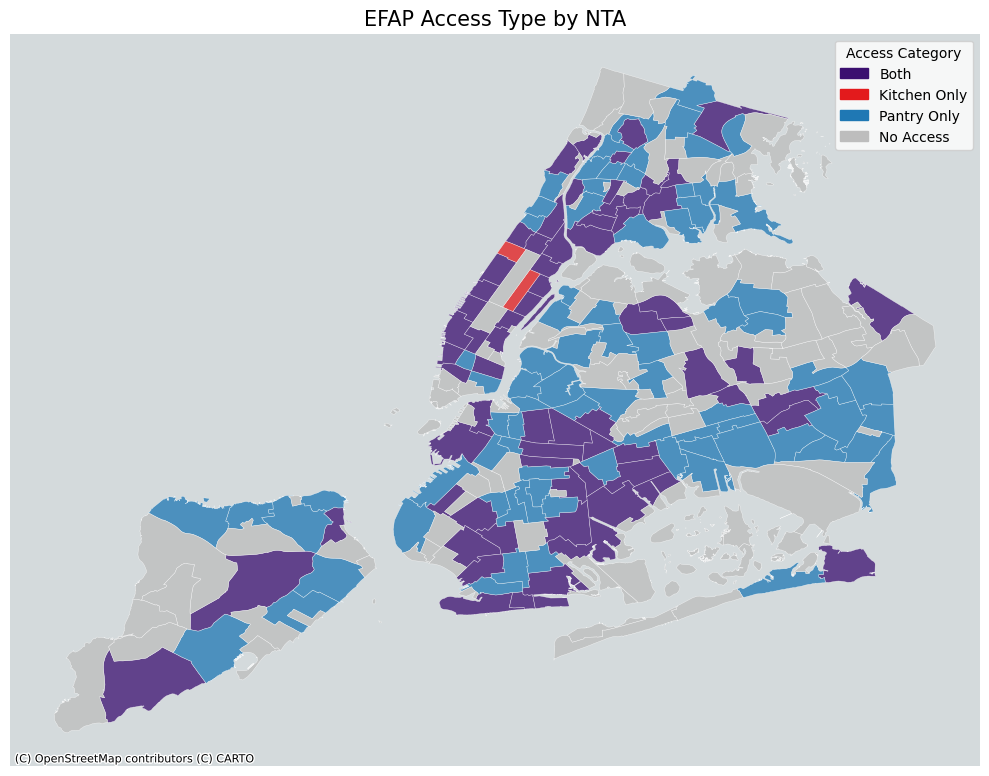

In [420]:
#gdf_web = gdf.to_crs(epsg=4326)

color_dict = {
    "Both": "#3B0F70",
    "Kitchen Only": "#E31A1C",
    "Pantry Only": "#1F78B4",
    "No Access": "#BDBDBD"
}

fig, ax = plt.subplots(figsize=(10, 10))

for category, color in color_dict.items():
    gdf_web[gdf_web["access_category"] == category].plot(
        ax=ax,
        color=color,
        alpha=0.75,
        edgecolor="white",
        linewidth=0.3
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_axis_off()
ax.set_title("EFAP Access Type by NTA", fontsize=15)

# ✅ Custom legend that works with GeoPandas
legend_handles = [
    mpatches.Patch(color=color, label=category)
    for category, color in color_dict.items()
]
ax.legend(handles=legend_handles, title="Access Category", loc="upper right")

plt.tight_layout()
plt.show()


### main key takeaway
 When we look at EFAP access across all NTAs citywide, the first thing that stands out is that the distribution is uneven, but not chaotic. The median number of sites per NTA is 3, and most neighborhoods have five or fewer sites. A few neighborhoods go up to 16, which pulls the average up to 3.6, but that’s not the norm. So overall, resources are somewhat concentrated in certain areas, while most neighborhoods are operating with relatively limited infrastructure.

When we map access types, we see that most neighborhoods fall into either “Pantry Only” or “Both Pantry and Kitchen.” Kitchen-only neighborhoods are extremely rare, which aligns with what we saw numerically. There are also a noticeable number of “No Access” NTAs, and those are not evenly spread across the city.

Visually, Brooklyn shows a mix of “Both” and “Pantry Only,” meaning there is at least some infrastructure present in most areas. Manhattan also has strong clustering of “Both,” which makes sense given density and service concentration. Queens, however, stands out. There are more NTAs marked as “No Access” there compared to other boroughs. Now, that does not automatically mean inequity. Some of those areas may not have high shelter density or may not be historically high-need zones. So the absence of EFAP sites there could be aligned with lower demand. We cannot conclude mismatch yet without layering in prioritization and shelter data.

So overall takeaway: EFAP infrastructure is not evenly distributed, but it is not randomly distributed either. It appears clustered in certain boroughs and sparse in others. The map suggests patterns that need to be interpreted in context, especially once we join this with neighborhood prioritization and shelter census data.

### Weekend and Weekday on an NTA - level

In [421]:
efap["weekday_available"] = efap["weekday_available"].astype(int)
efap["weekend_available"] = efap["weekend_available"].astype(int)

# build NTA-level fact table: total_sites, weekday_site_count, weekend_site_count, I asked co-pilot to help me create this
nta_fact = (
    efap.groupby("nta_id").agg(
          total_sites=("efap_id", "nunique"),
          weekday_site_count=("weekday_available", "sum"),
          weekend_site_count=("weekend_available", "sum")
      ).reset_index()
)
nta_fact.head()

,nta_id,total_sites,weekday_site_count,weekend_site_count
0,BK0101,1,1,0
1,BK0102,1,1,0
2,BK0103,1,1,0
3,BK0104,1,1,0
4,BK0202,3,2,1


In [422]:
# value counts: how many NTAs have 0 weekend sites, 1 weekend site, etc.
nta_fact["weekend_site_count"].value_counts().sort_index()

# summary stats
nta_fact[["total_sites", "weekday_site_count", "weekend_site_count"]].describe()

,total_sites,weekday_site_count,weekend_site_count
count,152.000000,152.000000,152.000000
mean,3.638158,2.743421,1.184211
std,2.739337,2.233095,1.309269
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000
75%,5.000000,4.000000,2.000000
max,16.000000,12.000000,7.000000


##### Key takeaway
- Weekday Access Is Much More Common Than Weekend Access. Average weekday sites per NTA: 2.74 and average weekend sites per NTA: 1.18
    - Even though the average NTA has around 3 to 4 total sites, only about 1 of them is open on weekends.
    - That tells us weekend access is structurally more limited.
- How many NTAs have 0 weekend access: Minimum weekend sites = 0 so that's 25% of NTAs have 0 weekend sites
    - That means at least a quarter of neighborhoods have no weekend food access at all.

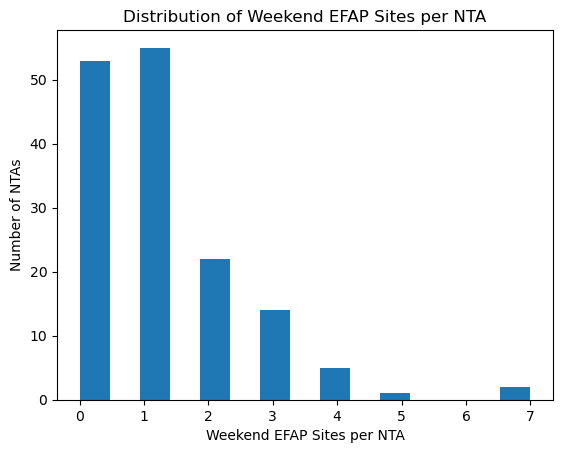

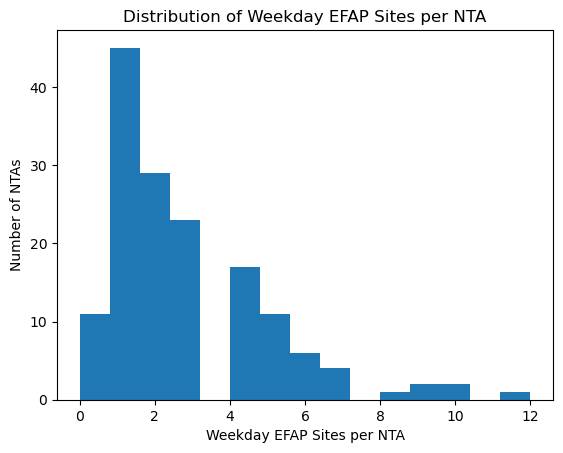

In [423]:
plt.figure()
plt.hist(nta_fact["weekend_site_count"], bins=15)
plt.title("Distribution of Weekend EFAP Sites per NTA")
plt.xlabel("Weekend EFAP Sites per NTA")
plt.ylabel("Number of NTAs")
plt.show()

plt.figure()
plt.hist(nta_fact["weekday_site_count"], bins=15)
plt.title("Distribution of Weekday EFAP Sites per NTA")
plt.xlabel("Weekday EFAP Sites per NTA")
plt.ylabel("Number of NTAs")
plt.show()

##### Key takeaway
- The distribution of **weekend EFAP** sites shows that weekend access is extremely limited across most NTAs. A large number of neighborhoods have 0 weekend sites, and many others have only 1. After that, the numbers drop off quickly. Only a small number of NTAs have 3 or more weekend sites, and just one or two reach as high as 5 or 7. This aligns with the summary statistics, where the average weekend site count is about 1.18, the median is 1, and the maximum is 7. Overall, this tells us that weekend food access is much more constrained and uneven compared to total site availability, meaning many neighborhoods have very limited support on Saturdays and Sundays.
- **Weekday EFAP** access looks noticeably stronger than weekend access. The average number of weekday sites per NTA is about 2.74, with a median of 2, and some neighborhoods reaching as high as 12 weekday sites. Most NTAs fall between 1 and 4 weekday sites, and while a few have 0, that number is much smaller compared to weekend gaps. The distribution is right-skewed, meaning a small number of neighborhoods have a high concentration of weekday programs, while most have modest coverage. Overall, this shows that food assistance infrastructure is much more available during the week than on weekends, reinforcing that weekend access is where the real constraint lies.

In [424]:
num_zero_weekend = (nta_fact["weekend_site_count"] == 0).sum()
pct_zero_weekend = num_zero_weekend / nta_fact.shape[0] * 100

num_zero_weekday = (nta_fact["weekday_site_count"] == 0).sum()
pct_zero_weekday = num_zero_weekday / nta_fact.shape[0] * 100

print("NTAs with 0 weekend sites:", num_zero_weekend, f"({pct_zero_weekend:.1f}%)")
print("NTAs with 0 weekday sites:", num_zero_weekday, f"({pct_zero_weekday:.1f}%)")

NTAs with 0 weekend sites: 53 (34.9%)
NTAs with 0 weekday sites: 11 (7.2%)


In [425]:
nta_fact["has_any_weekend"] = (nta_fact["weekend_site_count"] > 0).astype(int)

compare_weekend = (
    nta_fact.groupby("has_any_weekend")["total_sites"]
            .agg(count="count", mean="mean", median="median")
)
compare_weekend

,count,mean,median
has_any_weekend,,,
0,53,1.943396,1.0
1,99,4.545455,4.0


In [426]:
nta_fact["has_any_weekday"] = (nta_fact["weekday_site_count"] > 0).astype(int)

compare_weekday = (
    nta_fact.groupby("has_any_weekday")["total_sites"]
            .agg(count="count", mean="mean", median="median")
)
compare_weekday

,count,mean,median
has_any_weekday,,,
0,11,1.636364,1.0
1,141,3.794326,3.0


#### Key takeaway
When we compare NTAs with and without weekend access, the difference is pretty big. There are 53 NTAs with zero weekend sites, and those neighborhoods have an average of only 1.94 total sites overall, with a median of 1. Meanwhile, the 99 NTAs that do have at least one weekend site average 4.45 total sites, with a median of 4. So weekend access isn’t random. It tends to exist in neighborhoods that already have more overall food infrastructure.

Now look at weekdays. Only 11 NTAs have zero weekday sites, compared to 53 with zero weekend sites. And the 141 NTAs with weekday access have an average of 3.79 total sites, versus just 1.63 in NTAs without weekday access. Again, weekday access is much more widespread.

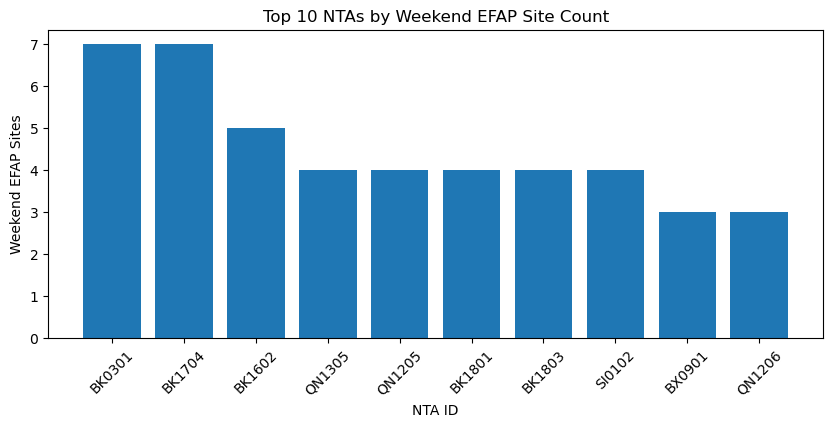

In [427]:
top_weekend = nta_fact.sort_values("weekend_site_count", ascending=False).head(10)

plt.figure(figsize=(10,4))
plt.bar(top_weekend["nta_id"], top_weekend["weekend_site_count"])
plt.title("Top 10 NTAs by Weekend EFAP Site Count")
plt.xlabel("NTA ID")
plt.ylabel("Weekend EFAP Sites")
plt.xticks(rotation=45)
plt.show()

---
# Shelter Census Dataset

In [428]:
census = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Projects/CID_Food_Access/data/clean/shelter_census_clean.csv')

In [429]:
census.head()

,report_date,borough,community_districts,family_with_children_commercial_hotel,family_with_children_shelter,family_cluster
0,2026-01-31,Queens,8.0,158.0,297.0,0.0
1,2026-01-31,Queens,7.0,76.0,0.0,0.0
2,2026-01-31,Queens,6.0,0.0,244.0,0.0
3,2026-01-31,Bronx,1.0,223.0,1463.0,0.0
4,2026-01-31,Bronx,10.0,0.0,529.0,0.0


In [430]:
census.isnull().sum()

report_date                                 0
borough                                     0
community_districts                        25
family_with_children_commercial_hotel    3010
family_with_children_shelter             1519
family_cluster                           4747
dtype: int64

#### Assumption on why we are imputing the nulls
In this dataset, we are assuming that null values in the shelter category columns do not represent missing or unknown data, but rather indicate that there were zero families recorded in that specific shelter type for that community district and month. Since the data is reported as counts, and other months show valid numeric entries for the same districts, it is reasonable to interpret these blanks as the absence of families in that category rather than uncollected data. Therefore, we impute null values with 0 to accurately reflect no recorded presence while preserving the integrity of the aggregation process. This allows us to compute yearly averages without artificially excluding districts or inflating counts.

In [431]:
census[
    [
        'family_with_children_commercial_hotel',
        'family_with_children_shelter',
        'family_cluster'
    ]
] = census[
    [
        'family_with_children_commercial_hotel',
        'family_with_children_shelter',
        'family_cluster'
    ]
].fillna(0)

In [432]:
# drop the cdta nulls
census = census.dropna(subset=['community_districts'])
census.isnull().sum()

report_date                              0
borough                                  0
community_districts                      0
family_with_children_commercial_hotel    0
family_with_children_shelter             0
family_cluster                           0
dtype: int64

In [433]:
census['report_date'] = pd.to_datetime(census['report_date'])

In [434]:
# filter the data to be only 2023 to 2024
census = census[(census['report_date'].dt.year >= 2023) & (census['report_date'].dt.year <= 2024)]

In [435]:
# sanity check
census['report_date'].dt.year.value_counts()

report_date
2024    708
2023    708
Name: count, dtype: int64

In [436]:
# create a year column
census['year'] = census['report_date'].dt.year
# create a month column
census['month'] = census['report_date'].dt.month
# creare a year_month column
census['year_month'] = census['report_date'].dt.to_period('M')
census.head()

,report_date,borough,community_districts,family_with_children_commercial_hotel,family_with_children_shelter,family_cluster,year,month,year_month
759,2024-12-31,Brooklyn,15.0,425.0,182.0,0.0,2024,12,2024-12
760,2024-12-31,Brooklyn,16.0,808.0,2376.0,0.0,2024,12,2024-12
761,2024-12-31,Brooklyn,17.0,319.0,1600.0,0.0,2024,12,2024-12
762,2024-12-31,Brooklyn,18.0,329.0,819.0,0.0,2024,12,2024-12
763,2024-12-31,Manhattan,1.0,527.0,0.0,0.0,2024,12,2024-12


In [440]:
cdta_yearly = (census.groupby(['community_districts', 'year'], as_index=False).mean(numeric_only=True))

In [445]:
cdta_yearly.head(10)

,community_districts,year,family_with_children_commercial_hotel,family_with_children_shelter,family_cluster,month
0,1.0,2023,1076.733333,423.216667,0.0,6.5
1,1.0,2024,1373.966667,424.916667,0.0,6.5
2,2.0,2023,312.650000,248.716667,0.0,6.5
3,2.0,2024,389.733333,230.300000,0.0,6.5
4,3.0,2023,447.966667,564.716667,0.0,6.5
5,3.0,2024,502.400000,522.450000,0.0,6.5
6,4.0,2023,384.937500,986.270833,0.0,6.5
7,4.0,2024,452.416667,959.375000,0.0,6.5
8,5.0,2023,777.000000,788.541667,0.0,6.5
9,5.0,2024,838.270833,835.562500,0.0,6.5


#### This process gives us 
- One row per CDTA per year
- Clean yearly averages
- No summing across categories

In [446]:
cdta_yearly['shelter_rank'] = (
    cdta_yearly
    .groupby('year')['family_with_children_shelter']
    .rank(method='dense', ascending=False)
)


In [448]:
# display the top 10
cdta_yearly.sort_values(['year','shelter_rank']).groupby('year').head(10)

,community_districts,year,family_with_children_commercial_hotel,family_with_children_shelter,family_cluster,month,shelter_rank
30,16.0,2023,547.833333,2442.166667,0.0,6.5,1.0
32,17.0,2023,265.250000,1186.416667,0.0,6.5,2.0
6,4.0,2023,384.937500,986.270833,0.0,6.5,3.0
34,18.0,2023,214.250000,932.333333,0.0,6.5,4.0
8,5.0,2023,777.000000,788.541667,0.0,6.5,5.0
10,6.0,2023,439.312500,684.166667,0.0,6.5,6.0
24,13.0,2023,150.375000,652.666667,0.0,6.5,7.0
16,9.0,2023,64.145833,591.625000,0.0,6.5,8.0
4,3.0,2023,447.966667,564.716667,0.0,6.5,9.0
22,12.0,2023,939.083333,520.291667,0.0,6.5,10.0


In [449]:
cdta_yearly['high_shelter_flag'] = (
    cdta_yearly
    .groupby('year')['family_with_children_shelter']
    .transform(lambda x: x >= x.quantile(0.75))
).astype(int)

In [452]:
cdta_yearly.head(50)

,community_districts,year,family_with_children_commercial_hotel,family_with_children_shelter,family_cluster,month,shelter_rank,high_shelter_flag
0,1.0,2023,1076.733333,423.216667,0.0,6.5,11.0,0
1,1.0,2024,1373.966667,424.916667,0.0,6.5,11.0,0
2,2.0,2023,312.650000,248.716667,0.0,6.5,15.0,0
3,2.0,2024,389.733333,230.300000,0.0,6.5,15.0,0
4,3.0,2023,447.966667,564.716667,0.0,6.5,9.0,0
5,3.0,2024,502.400000,522.450000,0.0,6.5,10.0,0
6,4.0,2023,384.937500,986.270833,0.0,6.5,3.0,1
7,4.0,2024,452.416667,959.375000,0.0,6.5,3.0,1
8,5.0,2023,777.000000,788.541667,0.0,6.5,5.0,1
9,5.0,2024,838.270833,835.562500,0.0,6.5,5.0,1


In [451]:
cdta_yearly.groupby('year')['high_shelter_flag'].value_counts()

year  high_shelter_flag
2023  0                    13
      1                     5
2024  0                    13
      1                     5
Name: count, dtype: int64

<Axes: title={'center': 'family_with_children_shelter'}, xlabel='year'>

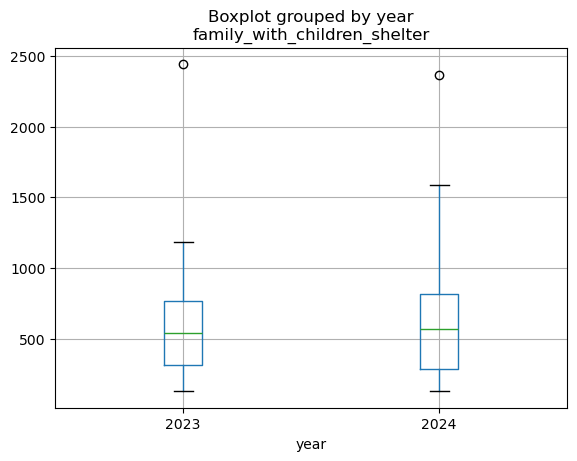

In [453]:
cdta_yearly.boxplot(
    column='family_with_children_shelter',
    by='year'
)

In [454]:
cdta_yearly.groupby('year')['family_with_children_shelter'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2023,18.0,643.271065,538.318824,131.458333,313.468750,542.504167,762.447917,2442.166667
2024,18.0,657.076389,561.992945,126.458333,287.447917,566.870833,817.010417,2367.916667


#### Key takeaway:
- The average shelter population per CDTA slightly increased from 2023 (~643) to 2024 (~657).
- The median also increased (542 → 567), suggesting the rise isn’t just driven by outliers
- The distribution is right-skewed, with very high maximum values in both years (around 2400+), meaning a few CDTAs carry a disproportionately large shelter burden.
- The spread (std) is high in both years, indicating significant variation across districts.
    - Overall, shelter concentration patterns look stable but slightly elevated in 2024.

In [455]:
cdta_final = (
    cdta_yearly
    .groupby('community_districts', as_index=False)
    ['family_with_children_shelter']
    .mean()
)

In [456]:
cdta_final

,community_districts,family_with_children_shelter
0,1.0,424.066667
1,2.0,239.508333
2,3.0,543.583333
3,4.0,972.822917
4,5.0,812.052083
5,6.0,722.760417
6,7.0,350.781250
7,8.0,233.062500
8,9.0,602.875000
9,10.0,293.718750


In [457]:
cdta_final['high_shelter_flag'] = (
    cdta_final['family_with_children_shelter'] 
    >= cdta_final['family_with_children_shelter'].quantile(0.75)
).astype(int)

In [460]:
cdta_final.head(5)

,community_districts,family_with_children_shelter,high_shelter_flag
0,1.0,424.066667,0
1,2.0,239.508333,0
2,3.0,543.583333,0
3,4.0,972.822917,1
4,5.0,812.052083,1


In [461]:
# sanity check timeee
cdta_final['high_shelter_flag'].value_counts()

high_shelter_flag
0    13
1     5
Name: count, dtype: int64

In [462]:
cdta_final.sort_values(
    by='family_with_children_shelter',
    ascending=False
).head()

,community_districts,family_with_children_shelter,high_shelter_flag
15,16.0,2405.041667,1
16,17.0,1384.958333,1
3,4.0,972.822917,1
17,18.0,918.875000,1
4,5.0,812.052083,1


---

# Main Takeaways & Justification

## Neighborhood Prioritization EDA — Final Synthesis

---

### Takeaway 1: The Bronx Leads Every Negative Indicator and Is the Most Food-Insecure Borough

The borough aggregation table shows the Bronx with the highest mean food insecurity (23.3%), the highest mean unemployment (11.2%), and a positive mean supply gap (+146,959) — meaning demand outpaces available food supply on average. The top 10 most food-insecure neighborhoods list is dominated by Bronx NTAs: West Farms (34.4%), Belmont (33.9%), Highbridge (32.1%), Claremont Village (31.6%), Mott Haven-Port Morris (31.4%), and Tremont (31.3%) all appear. Staten Island sits at the opposite end with the lowest mean food insecurity (11.3%) and unemployment (5.6%).

**Justification:** The bar chart of average food insecurity by borough confirms this visually — the Bronx is the only borough substantially above the citywide average line. The KDE overlay further shows the Bronx distribution is shifted rightward and barely overlaps with Staten Island's, meaning these two boroughs occupy nearly distinct ranges of food insecurity. However, the borough aggregation also reveals that the Bronx's standard deviation (6.50) is the highest, meaning even within the Bronx, neighborhood-level conditions vary considerably. Borough-level policy targeting alone would be too coarse.

**Statistical validation needed:** Kruskal-Wallis test across boroughs followed by Dunn's post-hoc with Bonferroni correction to confirm that the Bronx is statistically distinct, not just descriptively higher.

---

### Takeaway 2: Unemployment and Food Insecurity Are Correlated — But the Relationship Is Moderate

The scatter plot of unemployment vs. food insecurity shows a clear positive trend line, and the correlation heatmap confirms a Pearson r of approximately 0.49. This means unemployment explains only about 25% of the variance in food insecurity. The top 10 list reveals clear exceptions: East Williamsburg (Brooklyn) ranks #1 in food insecurity at 36.0% but has an unemployment rate of only 6.38%. Midtown-Times Square has 33.5% food insecurity with only 5.77% unemployment. Glen Oaks-Floral Park (Queens) has 31.1% food insecurity with just 4.19% unemployment.

**Justification:** These outliers visible in the scatter plot prove that food insecurity is driven by other factors beyond employment. 

**Statistical validation needed:** Spearman rank correlation (given non-normality confirmed by Shapiro-Wilk tests) with bootstrap confidence interval to quantify the true monotonic association and its uncertainty.

---

### Takeaway 3: The Weighted Score Is Driven Primarily by Food Insecurity and Supply Gap — Vulnerable Population Appears Underweighted

The weighted score decomposition shows that `food_insecure_percentage` and `supply_gap` have the strongest Pearson correlations with `weighted_score`, while `vulnerable_population_percentage` and `unemployment_rate` contribute less. The borough aggregation confirms that Queens has the highest mean vulnerable population rate (18.3%) across all five boroughs — yet Queens' mean weighted score is not proportionally elevated. Only two Queens neighborhoods appear in the top 10 most food-insecure list.

**Justification:** The standardized correlation analysis confirms the same ordering. If the prioritization index is intended to identify neighborhoods where need is greatest across all dimensions, then a composite score that effectively downweights the population most likely to be affected may systematically deprioritize Queens neighborhoods. This is a consideration worth surfacing to our stakeholders.

**Statistical validation needed:** Multiple linear regression with standardized coefficients (`weighted_score ~ food_insecure_percentage + unemployment_rate + vulnerable_population_percentage + supply_gap`) to quantify each component's actual weight in the formula, plus Variance Inflation Factor (VIF) to check if unemployment and food insecurity are too collinear to include together.

---

### Takeaway 4: The Supply Gap Is Bimodal — The Citywide Mean of Near-Zero Masks a Borough-Specific Split

The supply gap histogram shows a bimodal distribution with a positive median (~256K) but a near-zero mean (-19,769). The supply gap direction analysis reveals this is not random: Brooklyn and Queens have more neighborhoods with food surpluses (negative supply gap), while the Bronx and Manhattan lean toward demand gaps (positive). The scatter plots show that supply gap correlates positively with both food insecurity and weighted score, confirming that neighborhoods with larger demand deficits are appropriately flagged as higher priority.

**Justification:** The extreme range of the supply gap (-4.6 to +2.8) dwarfs all other variables in magnitude. The correlation analysis shows supply gap has a moderate positive relationship with the weighted score, meaning it meaningfully influences prioritization. But its raw scale means it could dominate distance-based or regression-based models. Any downstream modeling should apply a transformation (e.g., signed log: `sign(x) * log(1 + |x|)`) to prevent scale dominance while preserving directionality.

**Statistical validation needed:** Spearman correlation between supply gap and food insecurity + quantile regression at the 25th, 50th, and 75th percentiles to test whether the relationship holds across the full distribution or only at the extremes.

---

### Takeaway 5: Most Variables Fail Normality — All Downstream Analysis Must Use Non-Parametric Methods

The Shapiro-Wilk tests show that most key variables reject the null hypothesis of normality (p < 0.05). The Q-Q plots confirm deviations at the tails — food insecurity and unemployment are right-skewed (the histograms show long right tails), and supply gap departs from normality due to its bimodal shape. Only `weighted_score` approaches normality, likely because the composite formula smooths out individual variable skewness.

**Justification:** This finding directly constrains every statistical test and model the project can use. Pearson correlations, standard t-tests, and one-way ANOVA all assume normally distributed data. Since this assumption is violated, the project must use: Spearman correlations instead of Pearson, Mann-Whitney U instead of t-tests, Kruskal-Wallis instead of ANOVA, and robust or quantile regression instead of OLS. Ignoring non-normality would produce unreliable p-values and potentially invalid conclusions.

**Statistical validation needed:** Anderson-Darling test (more sensitive at the tails than Shapiro-Wilk) to double-confirm, plus Ramsey RESET test for functional form specification in any regression model.

---

### Takeaway 6: Non-Linear Relationships Exist Between Vulnerable Population and Both Food Insecurity and Unemployment

The Spearman vs. Pearson comparison table flagged two variable pairs with a meaningful gap (>0.05) between Spearman and Pearson correlations: food insecurity vs. vulnerable population (gap = +0.116) and unemployment vs. vulnerable population (gap = +0.125). Both were flagged as "LIKELY" non-linear. All other variable pairs showed negligible differences, meaning their relationships are approximately linear.

**Justification:** A Spearman correlation that substantially exceeds the Pearson correlation indicates a monotonic but curved relationship — the variables track together, but not at a constant rate. This likely reflects a threshold effect: vulnerability has little impact on food insecurity at low levels, but accelerates it beyond a certain point. A standard linear regression would underestimate these associations. Any multivariate model should include polynomial terms or interaction terms (e.g., `unemployment * vulnerable_population_percentage`) to capture this non-linearity.

**Statistical validation needed:** Polynomial regression or generalized additive model (GAM) to capture the curve, tested against a linear baseline using likelihood ratio or AIC comparison.

---

## Summary Table: Claims and Required Tests

| Claim from EDA | Recommended Test | Rationale |
|----------------|-----------------|-----------|
| Bronx has significantly higher food insecurity than other boroughs | Kruskal-Wallis + Dunn's post-hoc | Non-parametric ANOVA; normality assumption fails |
| Unemployment and food insecurity are positively associated | Spearman rank correlation + bootstrap CI | Monotonic correlation robust to skewed distributions |
| Weighted score underweights vulnerable population | Multiple regression with standardized betas + VIF | Quantifies each component's contribution; checks multicollinearity |
| Supply gap distribution is bimodal, not normal | Anderson-Darling test | Tail-sensitive normality test for the most skewed variable |
| Supply gap relates to food insecurity across the distribution | Quantile regression (25th, 50th, 75th percentiles) | Tests whether the association holds at extremes, not just the mean |
| Data violates normality assumptions for parametric tests | Shapiro-Wilk (done) + Anderson-Darling | Confirms non-parametric methods are required project-wide |
| Vulnerable population has a non-linear effect | GAM or polynomial terms + AIC comparison | Captures threshold/saturation effects missed by linear models |

---



# Summary For Emergency Food Assistance Program
### I asked gpt to give me a summary divided into sections


## 1. Data Cleaning and Geospatial Mapping

- 8 out of 561 EFAP sites (1.4%) could not be mapped to an NTA due to missing coordinates.
- Because this represents a very small proportion of total sites, these records were excluded from neighborhood-level aggregation.
- After cleaning, 152 NTAs contain at least one EFAP site.

**Key takeaway:** Data integrity is strong, and the small exclusions are unlikely to materially affect results.

---

## 2. Program-Level Structure (Pantry vs Kitchen)

- ~80% of programs are pantry-only.
- ~15% are kitchen-only.
- ~5% provide both pantry and kitchen access.
- ~85% of programs offer pantry access (including hybrid sites).
- ~20% offer kitchen access.

**Key takeaway:** NYC’s EFAP system is structurally pantry-dominant. The system is primarily designed around take-home grocery distribution rather than prepared meal service.

---

## 3. Temporal Accessibility (Weekday vs Weekend)

- Weekend availability is limited across all access types.
- Hybrid (Pantry + Kitchen) sites are highly weekday-oriented (~93%) but rarely operate on weekends (~18%).
- Pantry and kitchen sites also show limited weekend availability (~33–35%).

**Key takeaway:** The system is heavily weekday-dependent. Access is not just about food type, but also about when services are available.

---

## 4. Program Concentration

- ~91% of program names operate a single site.
- Only ~9% operate multiple sites.
- Multi-site operators account for ~17% of total EFAP sites.

**Key takeaway:** The EFAP system is highly decentralized, with most providers operating only one location.

---

## 5. NTA-Level Supply Distribution

Across 152 NTAs with at least one EFAP site:

- 41 NTAs have exactly 1 site.
- 50% of NTAs have 3 or fewer sites.
- 75% have 5 or fewer sites.
- The maximum observed is 16 sites in one NTA.
- Mean = 3.6 sites per NTA.
- Median = 3 sites per NTA.

**Key takeaway:** Supply is uneven but nuanced. Most neighborhoods operate with relatively limited infrastructure (1–5 sites), while a small number of NTAs have higher concentrations. The distribution is right-skewed but not dominated by extreme outliers.

---

## 6. Pantry vs Kitchen Access at the Neighborhood Level

- 81 NTAs (53%) have zero kitchen access.
- Only 2 NTAs (~1.3%) have zero pantry access.
- NTAs without kitchen access:
  - Average total sites = 2.58
  - Median = 2
- NTAs with kitchen access:
  - Average total sites = 4.85
  - Median = 4

**Key takeaway:** Kitchen access is geographically absent in more than half of neighborhoods. Additionally, kitchen infrastructure tends to appear in NTAs that already have stronger overall EFAP presence. Neighborhoods with weaker overall supply are also less likely to have hot-meal options.

---

## 7. Spatial Patterns (Map-Level Insights)

- Manhattan shows clustering of NTAs with both pantry and kitchen access.
- Brooklyn shows a mix of “Both” and “Pantry Only.”
- Queens contains a noticeable number of “No Access” NTAs.
- Kitchen-only NTAs are extremely rare.

**Key takeaway:** EFAP infrastructure is not randomly distributed. It appears spatially clustered in certain boroughs and sparse in others. However, geographic absence alone does not imply inequity without comparing supply to neighborhood-level need.

---

## Overall Summary

The EFAP system in NYC is pantry-dominant, weekday-oriented, decentralized, and geographically uneven. While some NTAs have concentrated food infrastructure, most neighborhoods operate with relatively limited supply. Kitchen access, in particular, is absent in over half of NTAs and tends to cluster in neighborhoods that already have stronger EFAP presence. 

These findings establish a structural understanding of supply. The next step is to evaluate whether this supply aligns with neighborhood-level prioritization and indicators of food insecurity.


----
# Summary for Shelter Census
## objective of this EDA section
- The goal of this analysis was to define and measure shelter concentration across community districts (CDTAs) for families with children during 2023–2024. This creates a clean, defensible variable representing shelter burden that can later be used in broader analysis.

### What I measured
- I focused on `family_with_children_shelter` and intentionally did not combine `family_with_children_commercial_hotel` and `family_cluster` because those categories may overlap and could risk double counting. Keeping them separate preserves clarity and integrity.

#### What I did
- I filtered the dataset -- restricted the data to 2023 and 2024 only to align with our analysis period.
- Null values in shelter category columns were imputed as 0.
    - __Assumption:__ These represent no recorded families, not missing data.
    - Rows missing community_districts were removed.
        - __Assumption:__ Without a geographic identifier, they cannot be reliably used.

- Aggregated to yearly averages and calculated the mean of `family_with_children_shelter`. Which gave the average number of families with children in shelter per district per year. This is not a total count!! It represents average ongoing shelter burden within each district.

- Collapsed 2023–2024 into one value per district: 
    - then averaged the yearly values again to create:
        - One average shelter concentration number per CDTA across 2023–2024.
        - This number answers: On average, how many families with children are in shelter in this district at a given time during 2023–2024?

- Created a high shelter concentration indicator - calculated the 75th percentile of the district averages.
     - Districts at or above this cutoff were labeled: `high_shelter_flag = 1`, others labeled as `high_shelter_flag = 0`
    - This created a clean binary classification of: 
        - High shelter concentration districts (top 25%)
        - Lower concentration districts (bottom 75%)

- **Key Results**
    - Total districts analyzed: 18
    - High shelter districts identified: 5
    - Lower shelter districts: 13

- **From descriptive statistics:**
    - Average shelter population slightly increased from 2023 to 2024
    - Median also increased, suggesting the increase is not driven solely by outliers
    - Distribution is right-skewed, meaning a small number of districts carry a disproportionately high shelter burden
    - Variation across districts is substantial

#### What I measured 
- The intensity of shelter burden across community districts, defined as the average number of families with children in shelter per district during 2023–2024. This is a concentration measure, not a cumulative count.
     - identifying which districts consistently carry higher ongoing shelter populations relative to others.

# Next Step:
- Join all data into one dataset
- Compute the Coverage ratio (Feature Engineering)
- Multicollinearity check: Compute VIF before any regression